In [1]:
states = ['LA', 'MS', 'AL', 'GA']
district_types = ['SS','SH']
minority = 'Black'
deviation = 0.10      # 0.10 means 10% means +/-5%
total_steps = 100000 # SHORT BURST STEPS
burst_length = 10
num_bursts = round( total_steps / burst_length )

In [2]:
from gerrychain import (GeographicPartition, Partition, Graph, MarkovChain,
                        proposals, updaters, accept, Election)
from gerrychain import constraints as constraints_class
from gerrychain.optimization import SingleMetricOptimizer, Gingleator
from functools import partial
import pandas as pd
import json
import matplotlib.pyplot as plt
from tqdm import tqdm
import numpy as np
import random

random.seed(2024)

In [3]:
import math
import networkx as nx

from number_of_districts import number_of_districts
from complete import recursive_bipartition_heuristic
from district import get_census_codes
from metrics import number_of_counties_split, number_of_county_splits, average_polsby_popper, report_metrics

codes = get_census_codes(minority)
filepath = 'C://districting-data-2020//'


*****************************************
Generating seed plan for LA SS vtd
*****************************************

number of nodes, edges: 3540 9889
Effectively using k, L, U = 39 113459 125401
Using one split county, attempting to bipartition cluster into sizes: 19 20
Set parameter Username
Academic license - for non-commercial use only - expires 2025-04-16


C:\Users\buchanan\OneDrive - Oklahoma A and M System\Code\polsby_popper_polished\Polsby_Popper_optimization\src\revision\district.py:179: DeprecationWarning: Calling quicksum on a tupledict is deprecated, use .sum() instead.
  m.addConstr( gp.quicksum( is_split ) <= split_counties_limit )


Using one split county, attempting to bipartition cluster into sizes: 10 10
Using one split county, attempting to bipartition cluster into sizes: 5 5
Using one split county, attempting to bipartition cluster into sizes: 2 3
Using one split county, attempting to bipartition cluster into sizes: 1 2
Using one split county, attempting to bipartition cluster into sizes: 1 1
Without limiting splits, attempting to bipartition cluster
Using one split county, attempting to bipartition cluster into sizes: 1 1
Using one split county, attempting to bipartition cluster into sizes: 2 3
Using one split county, attempting to bipartition cluster into sizes: 1 2
Using one split county, attempting to bipartition cluster into sizes: 1 1
Using one split county, attempting to bipartition cluster into sizes: 1 1
Using one split county, attempting to bipartition cluster into sizes: 5 5
Using one split county, attempting to bipartition cluster into sizes: 2 3
Using one split county, attempting to bipartition c

 36%|██████████████████████████▎                                              | 35979/100000 [21:39<1:41:59, 10.46it/s]C:\Users\buchanan\AppData\Local\anaconda3\Lib\site-packages\gerrychain\tree.py:704: BipartitionWarning: 
Failed to find a balanced cut after 1000 attempts.
If possible, consider enabling pair reselection within your
MarkovChain proposal method to allow the algorithm to select
a different pair of districts for recombination.
  warnings.warn(
100%|████████████████████████████████████████████████████████████████████████| 100000/100000 [1:02:03<00:00, 26.86it/s]


i gingles pp s1 s2
0 4.4428 0.3173 23 39
1000 7.4789 0.215 51 96
2000 9.384 0.2059 51 97
3000 10.3962 0.2099 54 103
4000 10.3962 0.2069 53 102
5000 11.4027 0.1986 52 99
6000 11.4128 0.211 54 97
7000 11.4204 0.187 52 99
8000 11.4351 0.2026 50 96
9000 11.4735 0.1926 49 95
10000 11.4865 0.1829 51 102
11000 11.4867 0.1982 52 104
12000 11.4867 0.2005 50 101
13000 11.4867 0.2157 52 97
14000 11.4918 0.1975 54 101
15000 11.4918 0.1973 54 91
16000 11.4918 0.198 54 99
17000 11.4948 0.192 55 102
18000 11.4948 0.2086 51 96
19000 12.4109 0.1987 48 98
20000 12.4109 0.1938 52 103
21000 12.4235 0.2173 54 110
22000 12.4236 0.2057 53 104
23000 12.4236 0.1912 55 104
24000 12.4236 0.1927 52 100
25000 12.4236 0.1868 52 100
26000 12.4236 0.185 51 106
27000 12.4236 0.2037 49 97
28000 12.4236 0.2133 54 101
29000 12.4236 0.2168 48 101
30000 12.4236 0.2023 50 102
31000 12.4236 0.191 49 97
32000 12.4239 0.2071 53 106
33000 12.4239 0.2055 52 107
34000 12.4239 0.2007 51 108
35000 12.4239 0.2036 52 104
36000 12.423

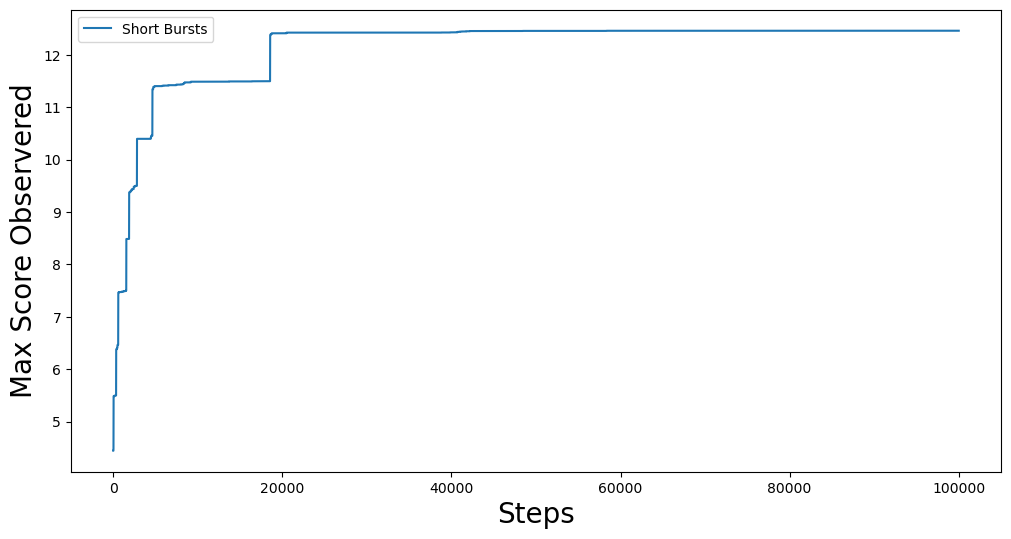

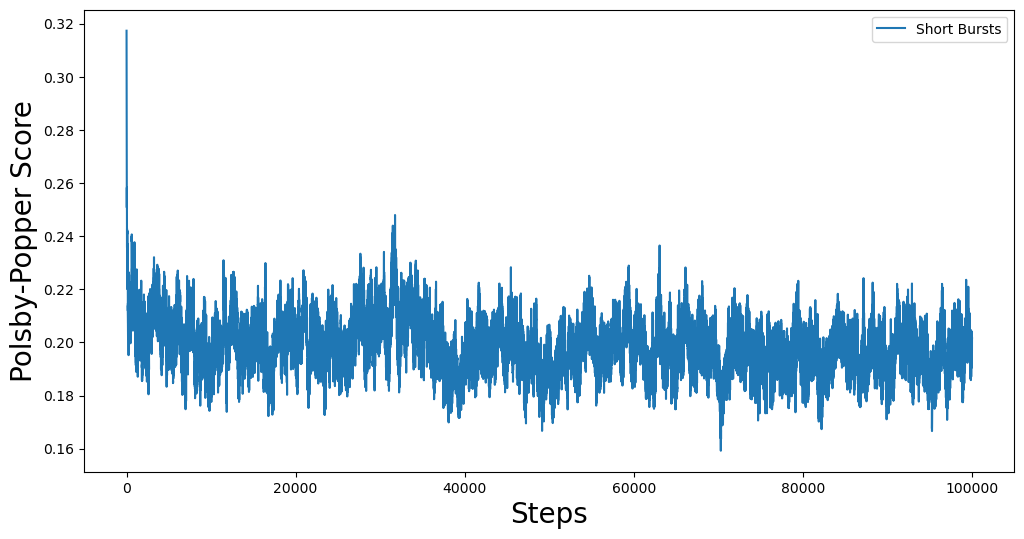

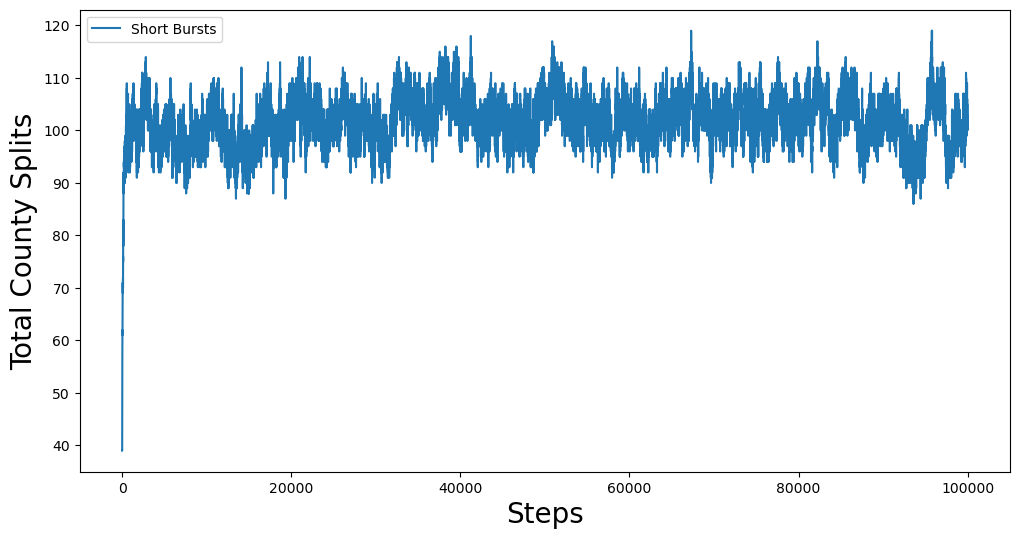


*****************************************
Starting short bursts for LA SS vtd
Region-aware: True
*****************************************



100%|████████████████████████████████████████████████████████████████████████| 100000/100000 [1:01:00<00:00, 27.32it/s]


i gingles pp s1 s2
0 4.4428 0.3173 23 39
1000 6.4945 0.275 29 46
2000 8.4601 0.281 34 52
3000 9.4589 0.251 30 51
4000 9.4735 0.2394 35 57
5000 9.4873 0.2609 34 54
6000 9.4873 0.2555 30 51
7000 9.4892 0.2593 33 53
8000 9.4941 0.2627 28 51
9000 9.4941 0.2837 30 46
10000 9.4941 0.2773 27 45
11000 10.4083 0.2623 29 48
12000 10.4143 0.2646 29 48
13000 10.4178 0.2479 25 45
14000 10.438 0.266 30 54
15000 10.4805 0.239 32 53
16000 10.4955 0.2521 30 53
17000 10.4955 0.2517 29 53
18000 10.4955 0.2462 33 53
19000 11.3743 0.2554 30 49
20000 11.3897 0.2474 31 50
21000 11.4222 0.2575 30 51
22000 11.4299 0.2528 29 47
23000 11.4299 0.2563 31 51
24000 11.4365 0.2394 35 57
25000 11.4493 0.2259 35 55
26000 11.4576 0.2543 28 46
27000 11.4604 0.2429 29 49
28000 11.4604 0.2598 32 53
29000 11.4726 0.2553 32 52
30000 11.4726 0.24 32 53
31000 11.4726 0.24 33 52
32000 11.4726 0.2351 31 55
33000 11.4726 0.2551 33 56
34000 11.4726 0.2587 32 52
35000 11.4726 0.2575 31 55
36000 11.4833 0.2481 32 52
37000 11.4833 0.

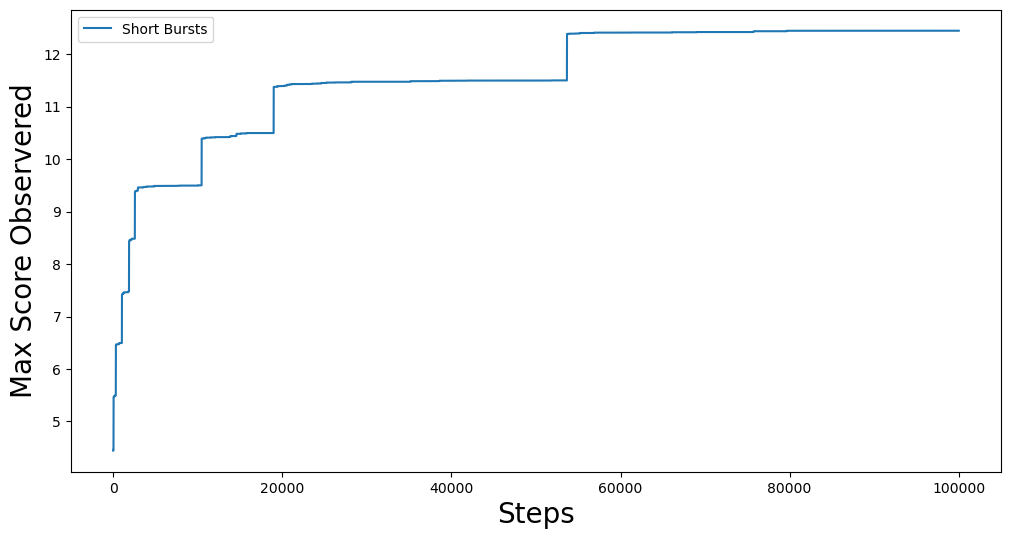

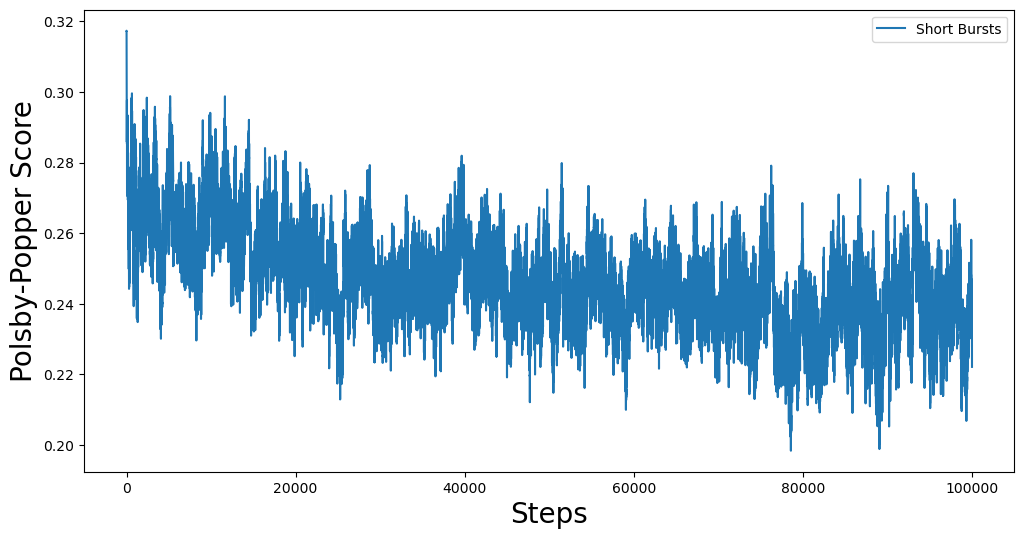

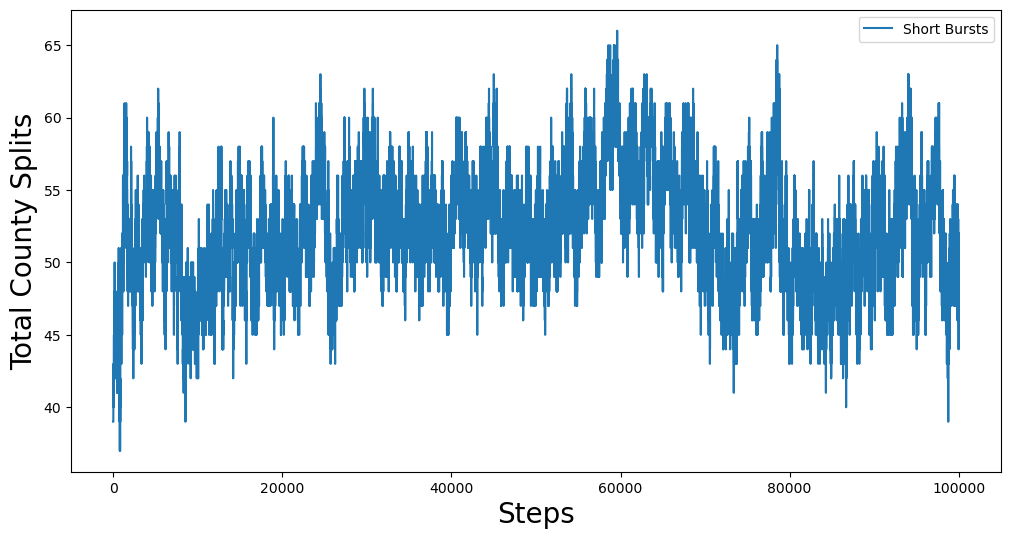


*****************************************
Generating seed plan for LA SH blockgroup
*****************************************

number of nodes, edges: 4294 11880
Effectively using k, L, U = 105 42142 46577
Using one split county, attempting to bipartition cluster into sizes: 52 53
Using one split county, attempting to bipartition cluster into sizes: 26 27
Using one split county, attempting to bipartition cluster into sizes: 13 14
Using one split county, attempting to bipartition cluster into sizes: 7 7
Using one split county, attempting to bipartition cluster into sizes: 3 4
Using one split county, attempting to bipartition cluster into sizes: 2 2
Using one split county, attempting to bipartition cluster into sizes: 1 1
Using one split county, attempting to bipartition cluster into sizes: 1 1
Using one split county, attempting to bipartition cluster into sizes: 1 2
Using one split county, attempting to bipartition cluster into sizes: 1 1
Using one split county, attempting to bipartiti

100%|██████████████████████████████████████████████████████████████████████████| 100000/100000 [48:19<00:00, 34.48it/s]


i gingles pp s1 s2
0 15.4951 0.3472 38 104
1000 23.4489 0.2422 55 179
2000 23.4966 0.2536 53 175
3000 25.4606 0.2213 59 193
4000 27.4586 0.2355 57 187
5000 27.4724 0.2522 54 187
6000 27.479 0.2477 53 185
7000 27.479 0.235 53 181
8000 27.479 0.2439 55 188
9000 27.4911 0.2521 56 181
10000 27.4911 0.2435 54 181
11000 27.4911 0.2254 57 200
12000 27.4974 0.2366 58 196
13000 27.4997 0.2445 59 191
14000 28.4997 0.242 57 183
15000 29.4626 0.2464 58 187
16000 29.479 0.2415 59 202
17000 29.479 0.2318 60 200
18000 29.479 0.2495 58 188
19000 30.4291 0.2503 60 193
20000 30.4668 0.248 58 188
21000 30.471 0.2405 55 188
22000 30.4908 0.2465 54 193
23000 31.4299 0.2452 57 184
24000 31.4299 0.2262 58 194
25000 31.4459 0.2425 59 191
26000 31.4459 0.2359 60 203
27000 31.4546 0.2225 58 199
28000 31.4549 0.2323 61 200
29000 31.4549 0.2433 59 191
30000 31.4549 0.2426 61 199
31000 31.4595 0.2392 62 196
32000 31.466 0.2197 61 204
33000 31.4772 0.2344 57 189
34000 31.4772 0.2291 59 185
35000 32.4099 0.2369 60 1

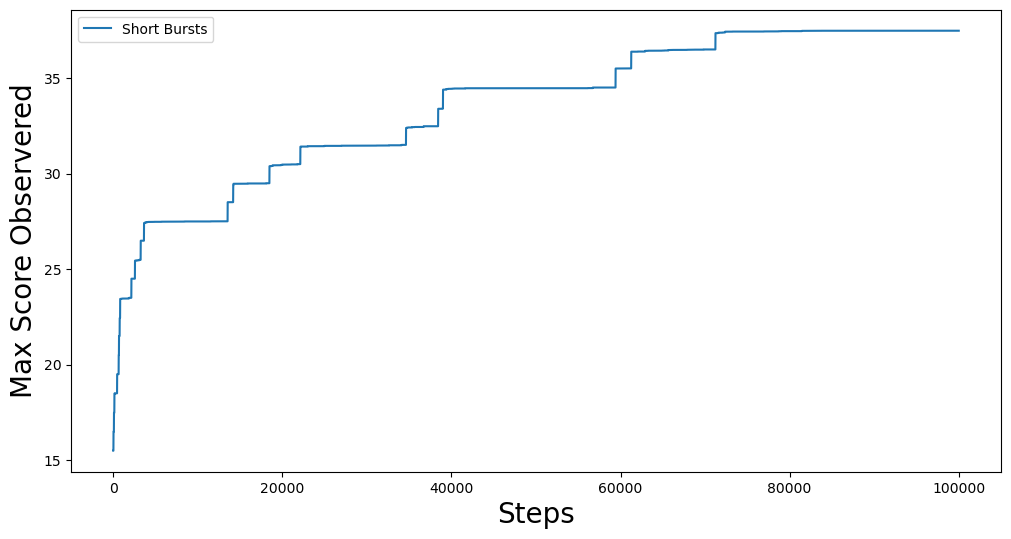

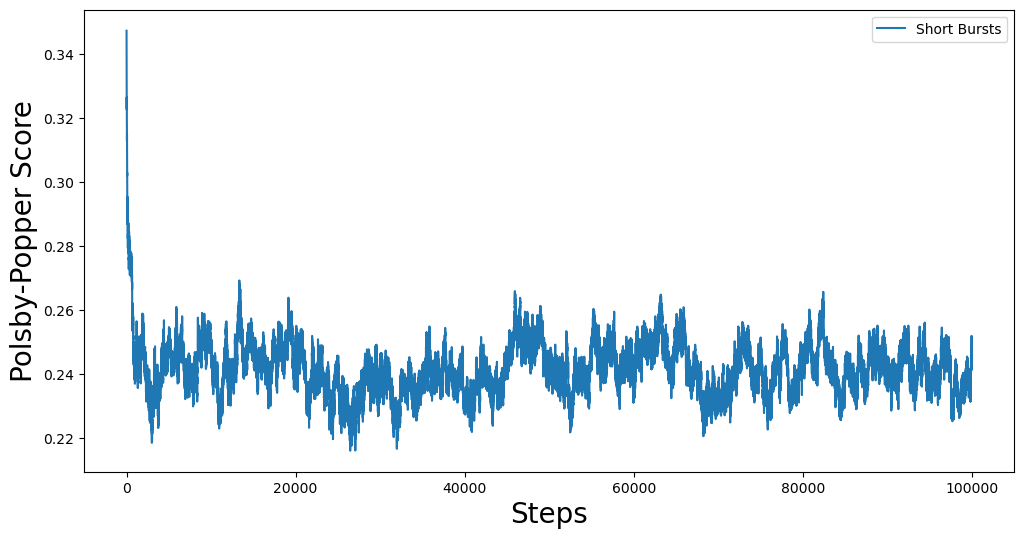

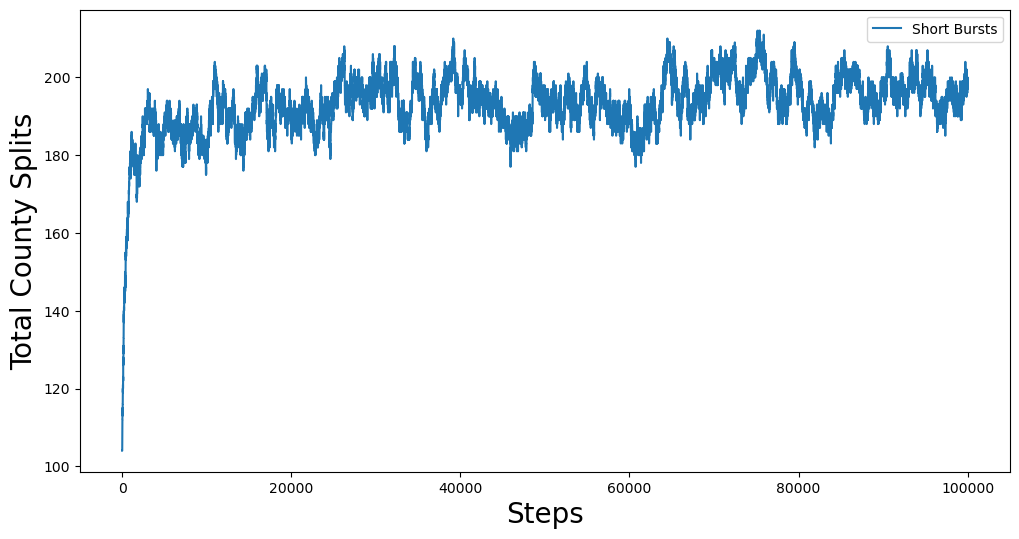


*****************************************
Starting short bursts for LA SH blockgroup
Region-aware: True
*****************************************



100%|██████████████████████████████████████████████████████████████████████████| 100000/100000 [41:31<00:00, 40.14it/s]


i gingles pp s1 s2
0 15.4951 0.3472 38 104
1000 20.4994 0.2768 42 115
2000 24.4508 0.2781 38 111
3000 25.4792 0.2621 43 119
4000 27.428 0.2676 39 113
5000 27.4399 0.2727 43 120
6000 27.4727 0.2713 39 115
7000 27.4927 0.2694 39 113
8000 28.4172 0.259 42 119
9000 28.4361 0.2631 41 117
10000 29.4178 0.273 39 115
11000 29.4571 0.2736 42 117
12000 29.4573 0.2651 46 123
13000 29.4649 0.2681 44 129
14000 29.4749 0.2585 44 127
15000 29.4839 0.2637 42 124
16000 29.4839 0.253 44 127
17000 30.4839 0.2632 45 129
18000 31.3975 0.2706 40 117
19000 31.4317 0.2627 38 123
20000 31.4629 0.2696 38 123
21000 31.4629 0.2631 38 123
22000 31.4629 0.2636 37 120
23000 31.4733 0.2557 42 125
24000 31.4733 0.2569 44 119
25000 31.4733 0.2788 39 115
26000 31.4733 0.2569 39 113
27000 31.4733 0.2749 38 113
28000 31.4733 0.2638 39 119
29000 31.483 0.264 38 115
30000 31.483 0.2682 37 113
31000 31.483 0.2888 36 113
32000 31.483 0.2637 38 117
33000 31.4836 0.2728 36 112
34000 31.4836 0.2679 36 110
35000 31.4836 0.2685 37

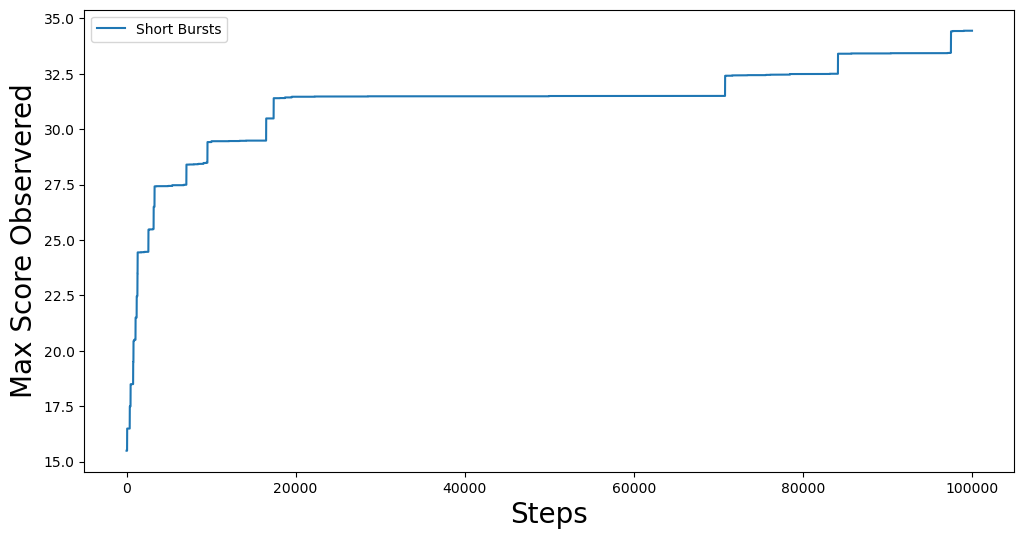

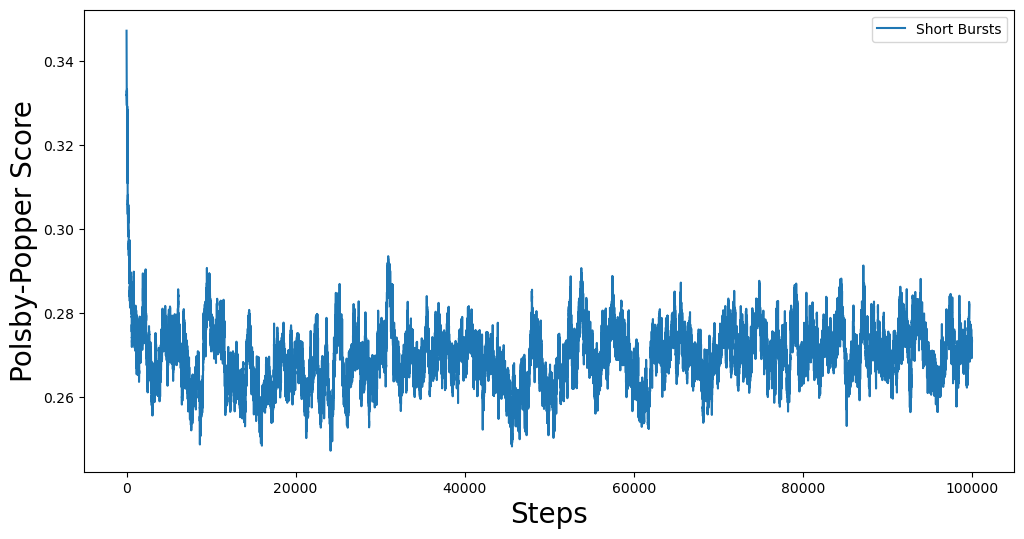

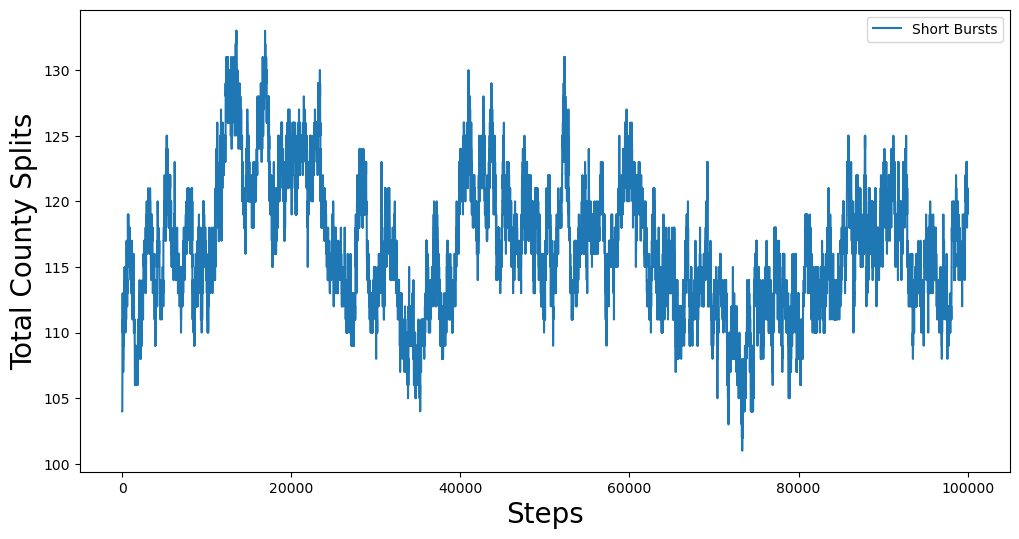


*****************************************
Generating seed plan for MS SS vtd
*****************************************

number of nodes, edges: 1834 5221
Effectively using k, L, U = 52 54101 59795
Using one split county, attempting to bipartition cluster into sizes: 26 26
Using one split county, attempting to bipartition cluster into sizes: 13 13
Using one split county, attempting to bipartition cluster into sizes: 6 7
Using one split county, attempting to bipartition cluster into sizes: 3 4
Using one split county, attempting to bipartition cluster into sizes: 2 2
Using one split county, attempting to bipartition cluster into sizes: 1 1
Using one split county, attempting to bipartition cluster into sizes: 1 1
Using one split county, attempting to bipartition cluster into sizes: 1 2
Using one split county, attempting to bipartition cluster into sizes: 1 1
Using one split county, attempting to bipartition cluster into sizes: 3 3
Using one split county, attempting to bipartition cluster 

100%|██████████████████████████████████████████████████████████████████████████| 100000/100000 [27:29<00:00, 60.64it/s]


i gingles pp s1 s2
0 10.4854 0.3574 32 51
1000 17.4519 0.1905 72 131
2000 17.4899 0.2074 70 130
3000 18.4289 0.2049 72 141
4000 18.474 0.2396 67 132
5000 19.4166 0.2229 70 132
6000 19.4267 0.2079 70 135
7000 19.4478 0.2226 69 128
8000 19.4814 0.2213 73 129
9000 19.4814 0.2226 74 130
10000 19.4814 0.2193 71 133
11000 19.4814 0.2106 71 128
12000 19.4814 0.1946 70 135
13000 19.4856 0.2016 69 132
14000 19.4856 0.2076 73 131
15000 19.4856 0.2177 71 130
16000 19.4926 0.2116 74 133
17000 19.4926 0.2224 73 131
18000 19.4926 0.2098 71 135
19000 19.4926 0.2345 71 127
20000 19.4926 0.2181 70 135
21000 19.4926 0.2226 68 132
22000 20.4308 0.204 72 135
23000 20.4668 0.2224 77 142
24000 20.4668 0.2138 71 128
25000 20.4805 0.201 68 132
26000 20.4805 0.2155 68 127
27000 20.4819 0.2194 69 124
28000 20.4842 0.2154 76 127
29000 20.487 0.2121 71 143
30000 20.487 0.206 72 138
31000 20.487 0.1956 71 138
32000 20.487 0.2041 75 139
33000 21.4912 0.203 73 130
34000 21.4943 0.2064 70 134
35000 22.3857 0.2166 70 

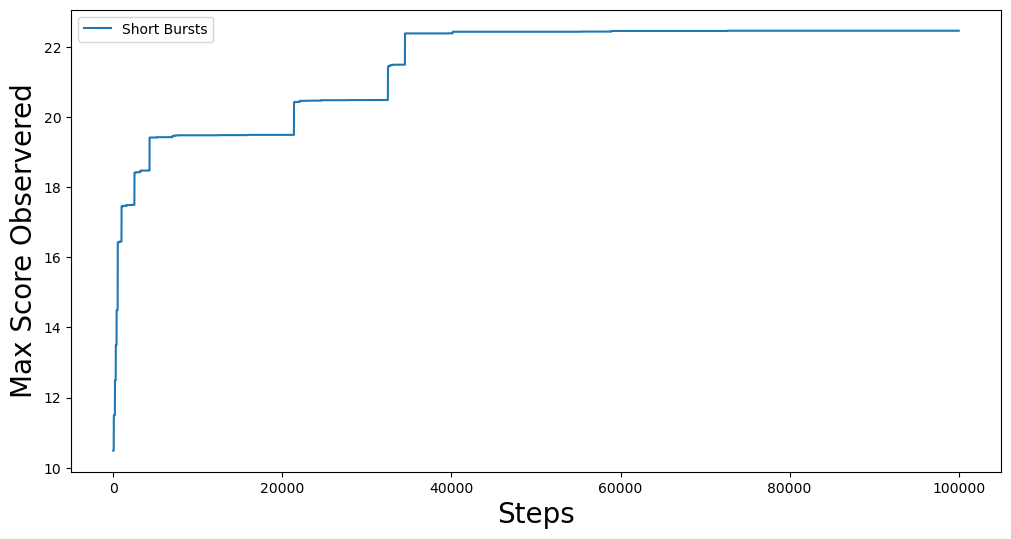

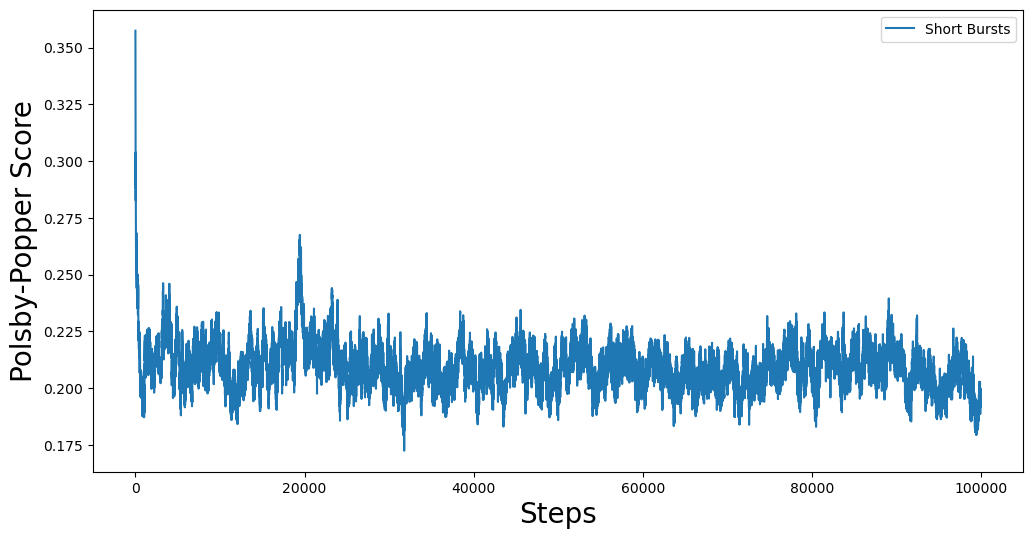

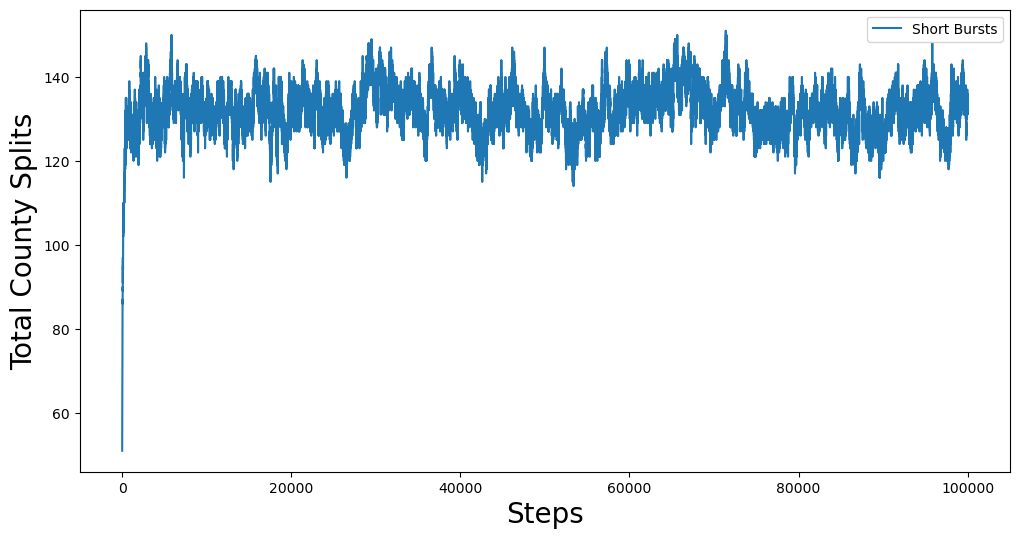


*****************************************
Starting short bursts for MS SS vtd
Region-aware: True
*****************************************



100%|██████████████████████████████████████████████████████████████████████████| 100000/100000 [26:03<00:00, 63.96it/s]


i gingles pp s1 s2
0 10.4854 0.3574 32 51
1000 14.4472 0.2964 38 56
2000 16.4534 0.2937 39 59
3000 17.4352 0.2804 42 60
4000 17.4747 0.289 46 61
5000 17.4859 0.2847 42 61
6000 18.4352 0.3123 35 54
7000 18.4352 0.3035 36 58
8000 18.4352 0.301 36 54
9000 18.4352 0.31 34 53
10000 18.4352 0.3136 39 58
11000 18.4693 0.2934 41 58
12000 18.4693 0.3023 39 59
13000 18.4693 0.3064 37 59
14000 18.4693 0.2999 36 55
15000 18.47 0.2981 41 64
16000 18.47 0.2799 40 61
17000 18.47 0.2947 41 60
18000 18.4702 0.2964 46 71
19000 18.4726 0.2938 48 70
20000 18.4726 0.286 41 67
21000 18.4726 0.2881 38 61
22000 18.4726 0.2913 40 61
23000 18.4763 0.2827 41 65
24000 18.4763 0.2841 38 59
25000 18.4778 0.2954 39 60
26000 18.4968 0.2834 44 66
27000 19.4166 0.281 41 64
28000 19.4346 0.2892 38 58
29000 19.4346 0.3013 34 55
30000 19.4419 0.2847 44 72
31000 19.4419 0.2807 39 59
32000 19.4419 0.2822 43 69
33000 19.459 0.2989 42 64
34000 19.459 0.2929 38 58
35000 19.459 0.31 42 66
36000 19.459 0.2982 42 68
37000 19.459 

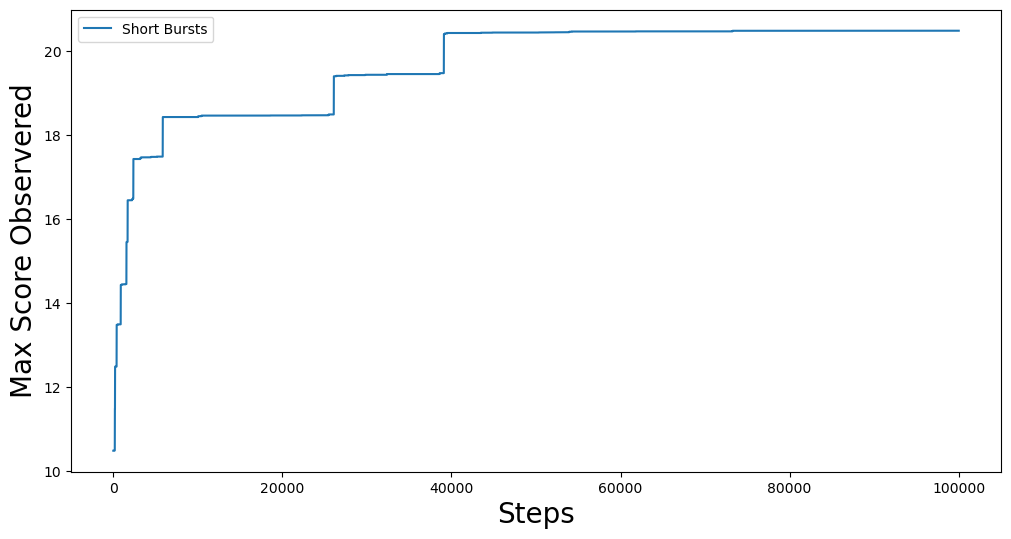

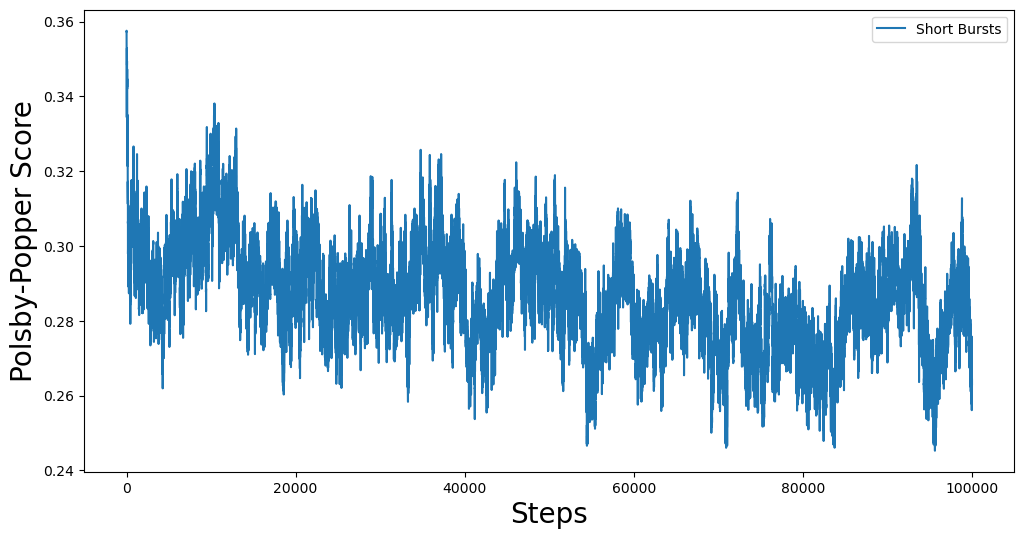

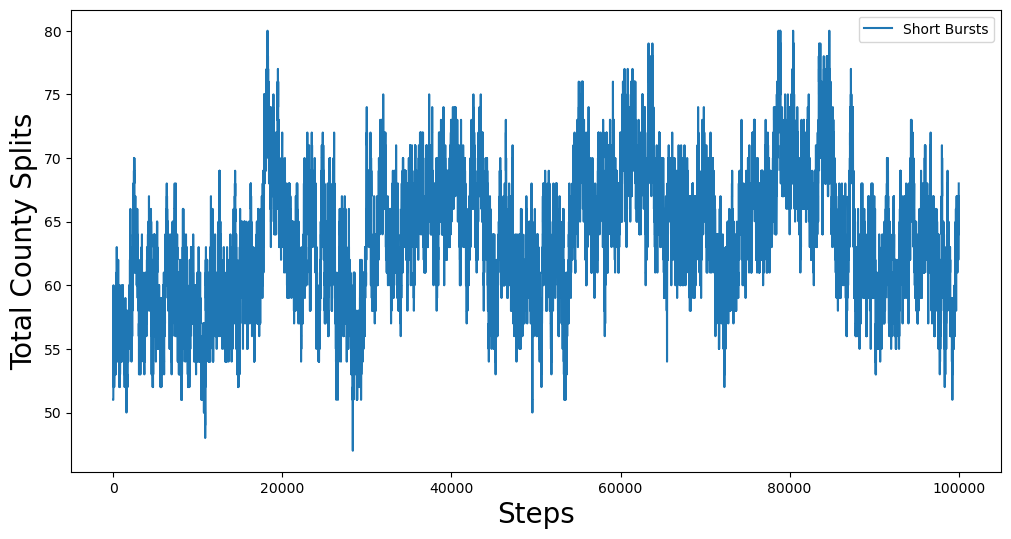


*****************************************
Generating seed plan for MS SH blockgroup
*****************************************

number of nodes, edges: 2445 6740
Effectively using k, L, U = 122 23060 25486
Using one split county, attempting to bipartition cluster into sizes: 61 61
Using one split county, attempting to bipartition cluster into sizes: 30 31
Using one split county, attempting to bipartition cluster into sizes: 15 16
Using one split county, attempting to bipartition cluster into sizes: 8 8
Using one split county, attempting to bipartition cluster into sizes: 4 4
Using one split county, attempting to bipartition cluster into sizes: 2 2
Using one split county, attempting to bipartition cluster into sizes: 1 1
Using one split county, attempting to bipartition cluster into sizes: 1 1
Using one split county, attempting to bipartition cluster into sizes: 2 2
Using one split county, attempting to bipartition cluster into sizes: 1 1
Using one split county, attempting to bipartitio

100%|██████████████████████████████████████████████████████████████████████████| 100000/100000 [26:14<00:00, 63.51it/s]


i gingles pp s1 s2
0 27.499 0.3682 51 116
1000 37.4808 0.2819 72 187
2000 39.448 0.2703 70 193
3000 40.4553 0.2773 70 193
4000 41.4792 0.2733 71 187
5000 41.4792 0.2586 74 196
6000 42.4792 0.2705 76 193
7000 42.4946 0.2559 72 199
8000 45.4624 0.2573 74 209
9000 45.4624 0.2592 75 203
10000 45.4624 0.2586 70 202
11000 45.4927 0.2557 75 201
12000 45.4927 0.2572 71 205
13000 45.4985 0.2575 78 214
14000 46.4556 0.2761 74 206
15000 47.4544 0.2632 75 204
16000 47.4544 0.2577 76 208
17000 48.438 0.259 76 209
18000 48.4439 0.2647 78 207
19000 48.4439 0.2649 76 193
20000 48.4995 0.2612 75 202
21000 49.487 0.261 75 201
22000 49.4974 0.2437 78 211
23000 49.4994 0.255 76 202
24000 49.4994 0.257 76 203
25000 49.4994 0.256 76 212
26000 49.4994 0.2663 75 203
27000 50.4341 0.2649 75 217
28000 50.4518 0.2584 75 215
29000 50.4608 0.2505 73 213
30000 51.4352 0.265 74 205
31000 51.4352 0.2501 76 215
32000 51.4753 0.2487 75 202
33000 51.4808 0.2554 73 200
34000 51.4902 0.2492 76 206
35000 52.4577 0.2544 76 

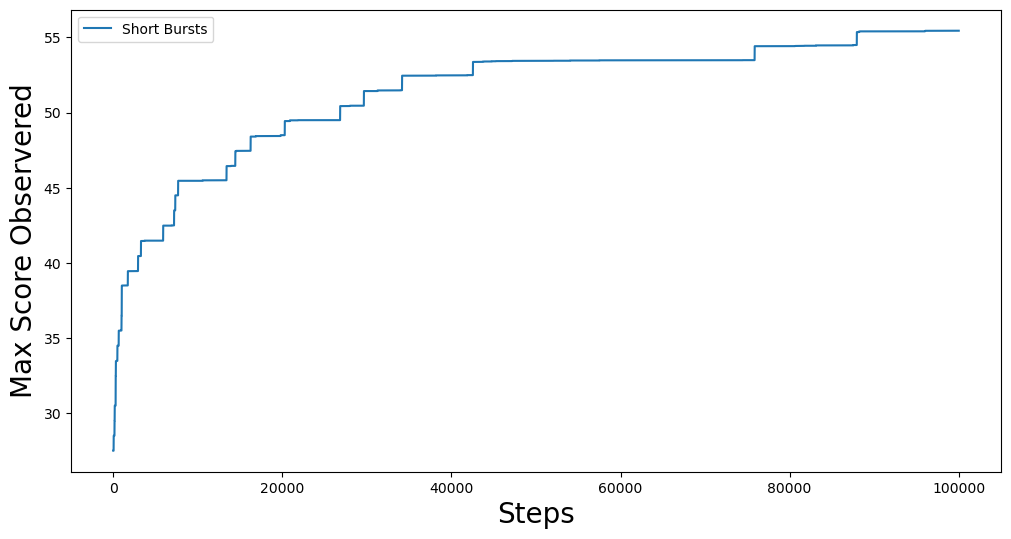

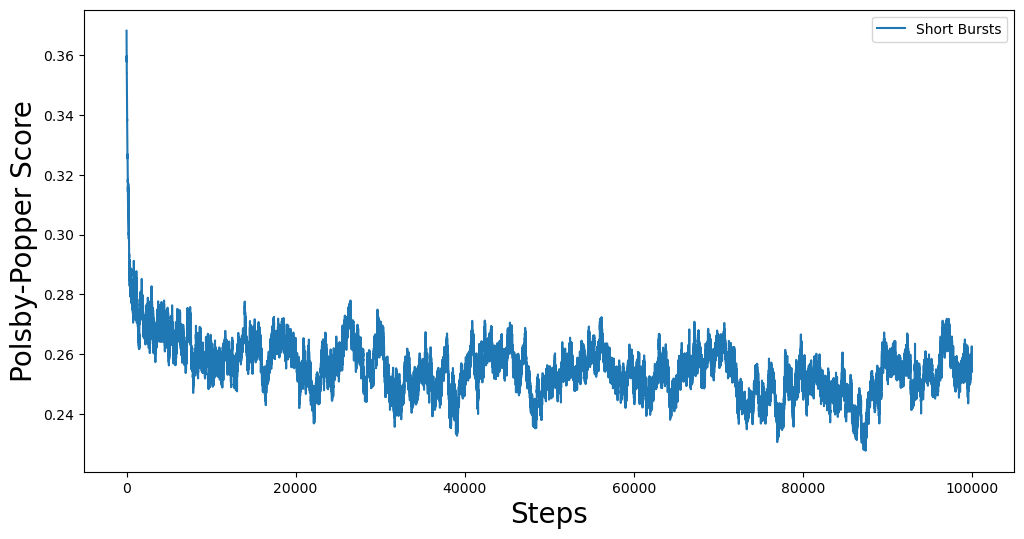

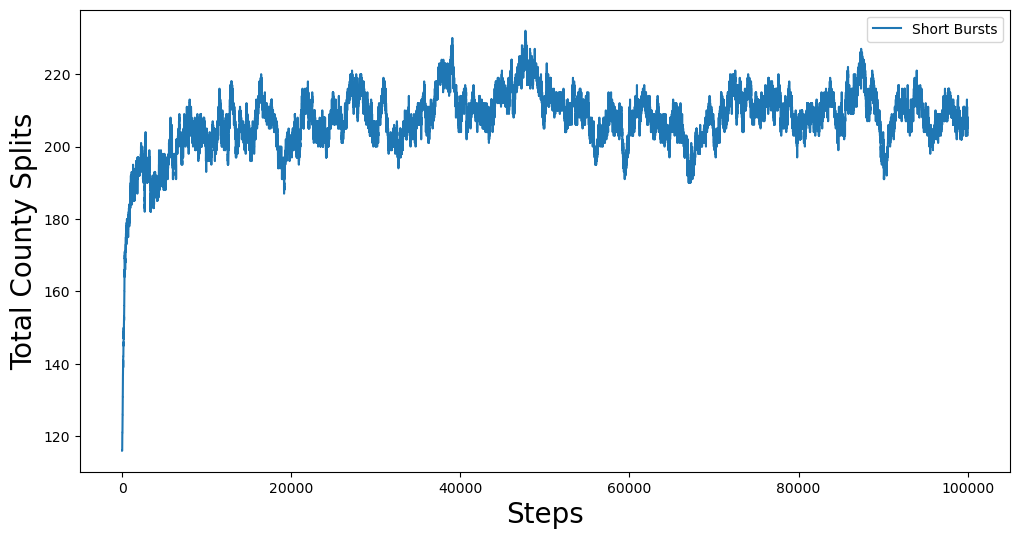


*****************************************
Starting short bursts for MS SH blockgroup
Region-aware: True
*****************************************



100%|██████████████████████████████████████████████████████████████████████████| 100000/100000 [25:20<00:00, 65.78it/s]


i gingles pp s1 s2
0 27.499 0.3682 51 116
1000 37.4965 0.3142 57 131
2000 39.4902 0.3125 57 134
3000 40.4974 0.3195 60 138
4000 41.4652 0.308 61 137
5000 41.4652 0.3091 60 138
6000 42.4652 0.3079 61 136
7000 42.4652 0.314 65 139
8000 42.4865 0.3074 63 136
9000 42.4999 0.3028 64 135
10000 43.4545 0.3006 62 140
11000 43.4684 0.2984 64 144
12000 43.4684 0.3102 64 144
13000 43.4711 0.3161 60 133
14000 43.4855 0.314 57 134
15000 43.4935 0.3191 59 137
16000 43.4935 0.3115 63 134
17000 43.4948 0.3007 62 134
18000 44.4552 0.3147 60 124
19000 45.4753 0.3092 59 124
20000 45.4787 0.2966 65 132
21000 45.4787 0.2966 65 136
22000 45.4787 0.2954 66 141
23000 46.4542 0.2834 65 142
24000 46.4542 0.2958 66 138
25000 46.4542 0.2898 66 134
26000 46.49 0.3 64 133
27000 47.459 0.2956 64 133
28000 47.459 0.3056 63 132
29000 47.459 0.296 62 128
30000 47.4893 0.2963 63 131
31000 47.4893 0.3011 63 132
32000 47.4893 0.2938 63 137
33000 47.4893 0.2966 63 135
34000 47.4893 0.3186 63 135
35000 47.4893 0.3063 62 130

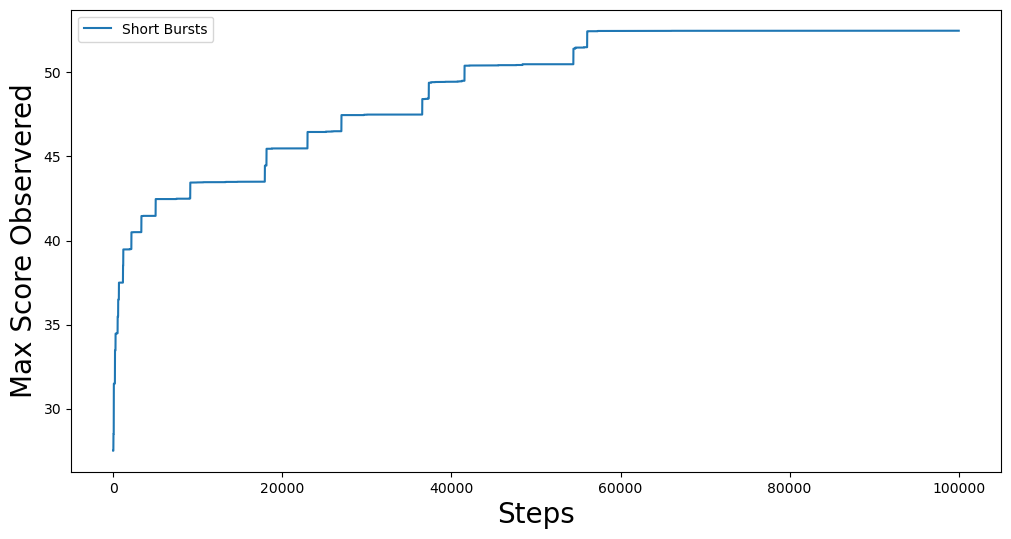

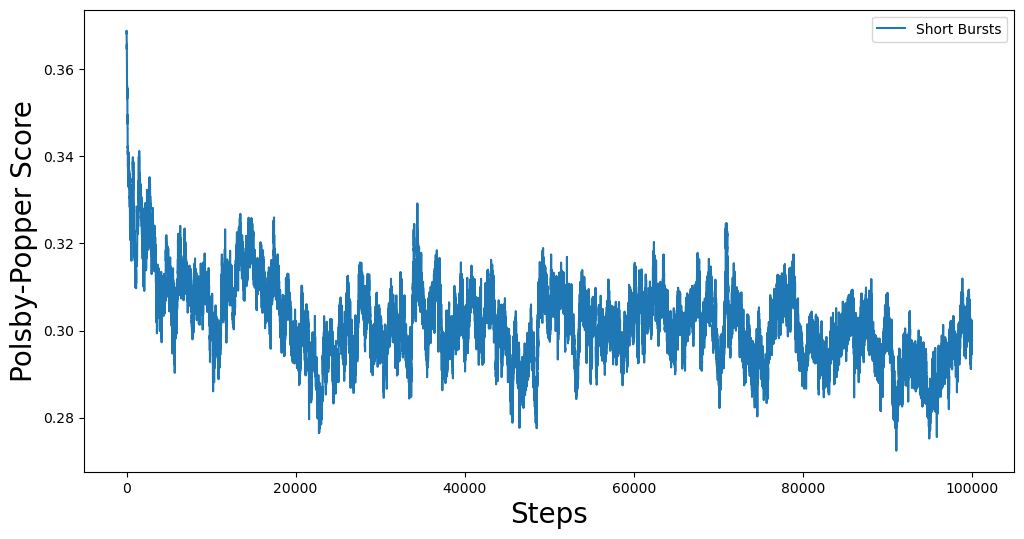

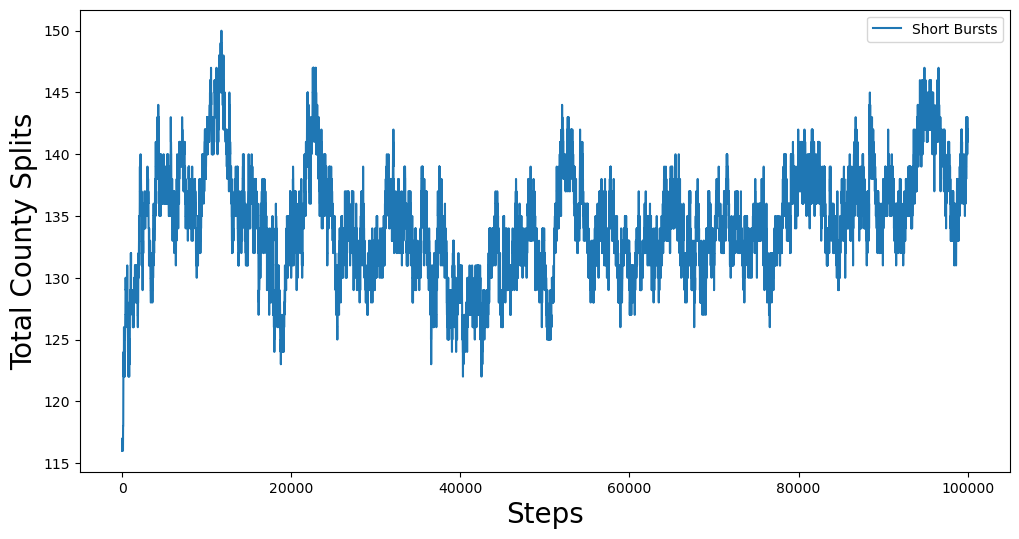


*****************************************
Generating seed plan for AL SS vtd
*****************************************

number of nodes, edges: 1837 5221
Effectively using k, L, U = 35 136374 150728
Using one split county, attempting to bipartition cluster into sizes: 17 18
Using one split county, attempting to bipartition cluster into sizes: 9 9
Using one split county, attempting to bipartition cluster into sizes: 4 5
Using one split county, attempting to bipartition cluster into sizes: 2 3
Using one split county, attempting to bipartition cluster into sizes: 1 2
Using one split county, attempting to bipartition cluster into sizes: 1 1
Using one split county, attempting to bipartition cluster into sizes: 1 1
Using one split county, attempting to bipartition cluster into sizes: 2 2
Using one split county, attempting to bipartition cluster into sizes: 1 1
Using one split county, attempting to bipartition cluster into sizes: 1 1
Using one split county, attempting to bipartition cluster 

100%|██████████████████████████████████████████████████████████████████████████| 100000/100000 [37:10<00:00, 44.84it/s]


i gingles pp s1 s2
0 4.4279 0.2963 24 34
1000 6.4619 0.1928 52 90
2000 7.4927 0.185 58 95
3000 8.4029 0.1845 55 103
4000 8.4145 0.18 55 95
5000 8.4145 0.183 55 97
6000 8.4165 0.1735 59 100
7000 8.4165 0.1795 57 97
8000 8.4292 0.1732 55 96
9000 8.4483 0.1713 59 104
10000 9.3912 0.1906 57 102
11000 9.4267 0.1648 53 102
12000 9.4267 0.1813 53 91
13000 9.4267 0.1822 53 96
14000 9.4279 0.173 52 102
15000 9.4495 0.1718 55 99
16000 9.4536 0.1694 55 96
17000 9.4536 0.1812 62 103
18000 9.458 0.1883 53 92
19000 9.458 0.1886 57 101
20000 9.458 0.1772 55 98
21000 9.458 0.181 53 89
22000 9.458 0.1825 54 91
23000 9.458 0.1825 55 101
24000 9.458 0.1996 49 95
25000 9.458 0.1841 55 98
26000 9.458 0.1833 59 101
27000 9.458 0.1843 56 93
28000 9.458 0.1873 56 96
29000 9.458 0.1734 54 94
30000 9.458 0.1708 54 100
31000 9.458 0.1689 55 97
32000 9.458 0.1741 54 95
33000 9.458 0.1749 55 100
34000 9.458 0.1829 55 97
35000 9.458 0.1882 53 95
36000 9.458 0.1998 51 90
37000 9.458 0.1711 54 91
38000 9.458 0.1843 5

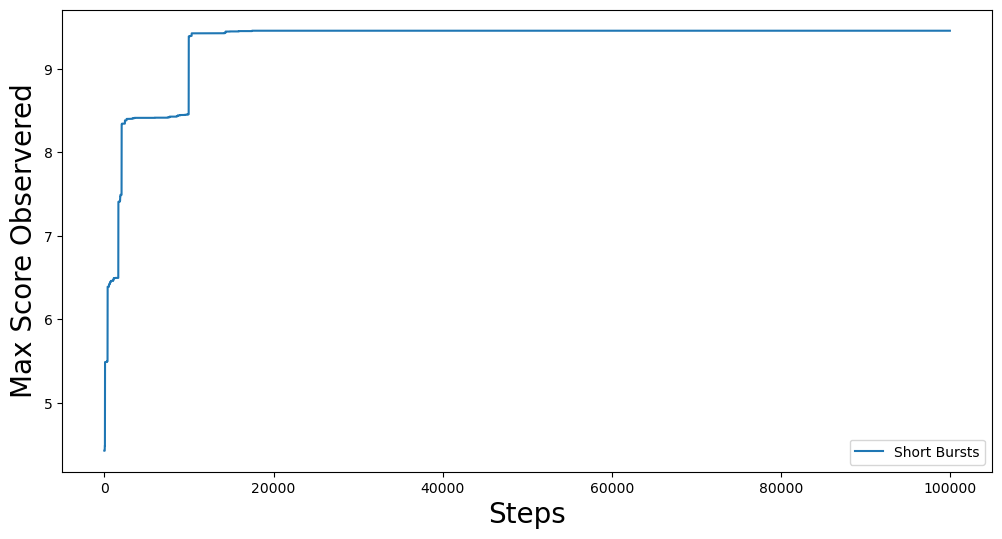

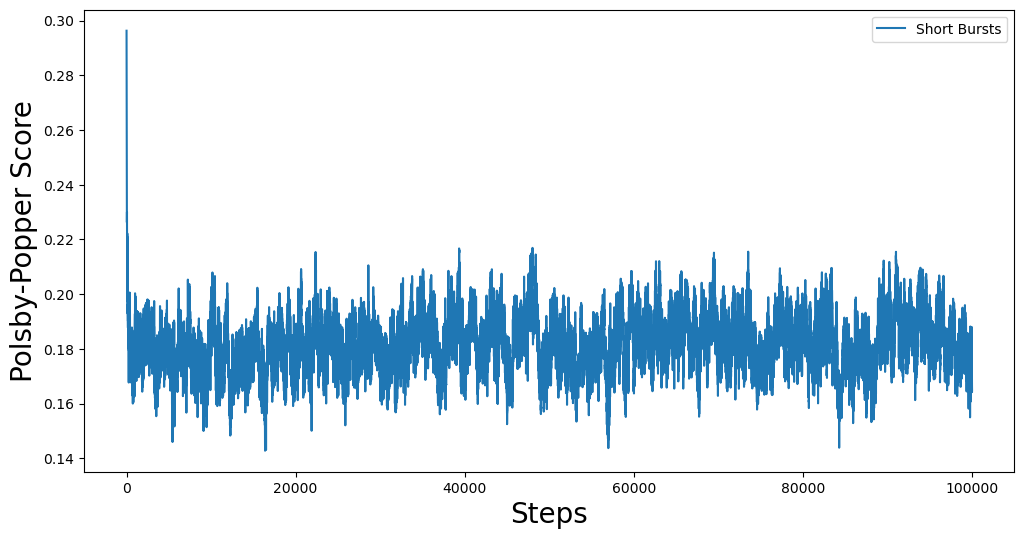

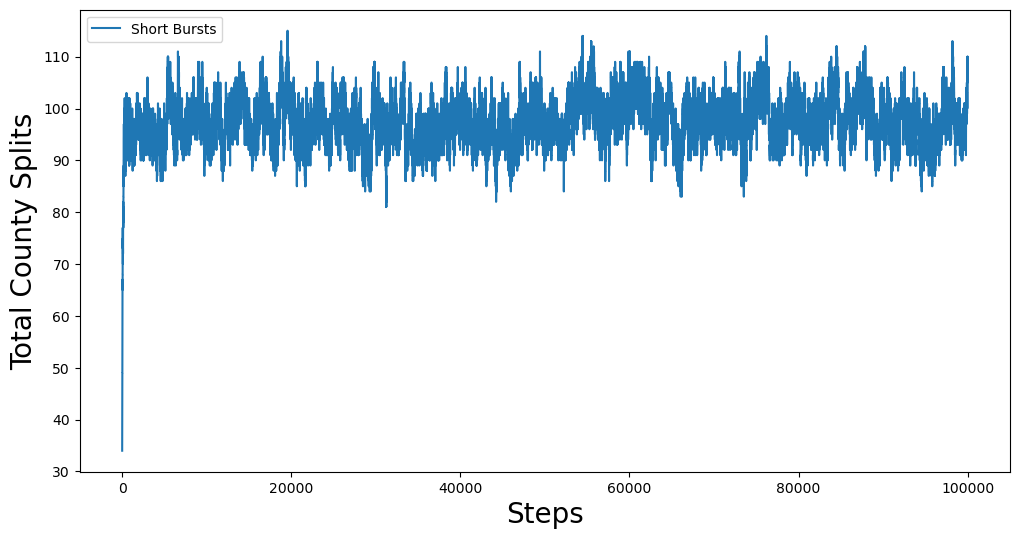


*****************************************
Starting short bursts for AL SS vtd
Region-aware: True
*****************************************



100%|██████████████████████████████████████████████████████████████████████████| 100000/100000 [34:36<00:00, 48.16it/s]


i gingles pp s1 s2
0 4.4279 0.2963 24 34
1000 6.4904 0.2457 30 44
2000 7.4976 0.2312 37 55
3000 7.4983 0.2211 29 47
4000 8.4941 0.231 32 49
5000 8.4941 0.2353 29 40
6000 8.4941 0.2146 36 51
7000 8.4968 0.2578 30 44
8000 9.3723 0.2371 36 46
9000 9.3866 0.2582 34 46
10000 9.4218 0.2722 29 44
11000 9.4454 0.2415 36 50
12000 9.453 0.2549 32 44
13000 9.453 0.2704 32 43
14000 9.453 0.262 39 56
15000 9.453 0.2763 30 39
16000 9.453 0.2679 30 42
17000 9.453 0.268 33 47
18000 9.453 0.2566 36 49
19000 9.453 0.2593 26 43
20000 9.453 0.2358 35 50
21000 9.453 0.2463 35 48
22000 9.4561 0.2344 33 45
23000 9.4561 0.2427 35 48
24000 9.4561 0.2194 34 56
25000 9.4561 0.23 36 50
26000 9.4561 0.2334 31 48
27000 9.4561 0.2326 30 42
28000 9.4561 0.2377 30 44
29000 9.4561 0.2193 35 54
30000 9.4561 0.2171 32 46
31000 9.4561 0.2426 33 47
32000 9.4561 0.2444 32 48
33000 9.4561 0.2413 34 48
34000 9.4561 0.2478 33 46
35000 9.4561 0.2443 30 44
36000 9.4561 0.2415 31 45
37000 9.4561 0.2338 36 48
38000 9.4561 0.2354 3

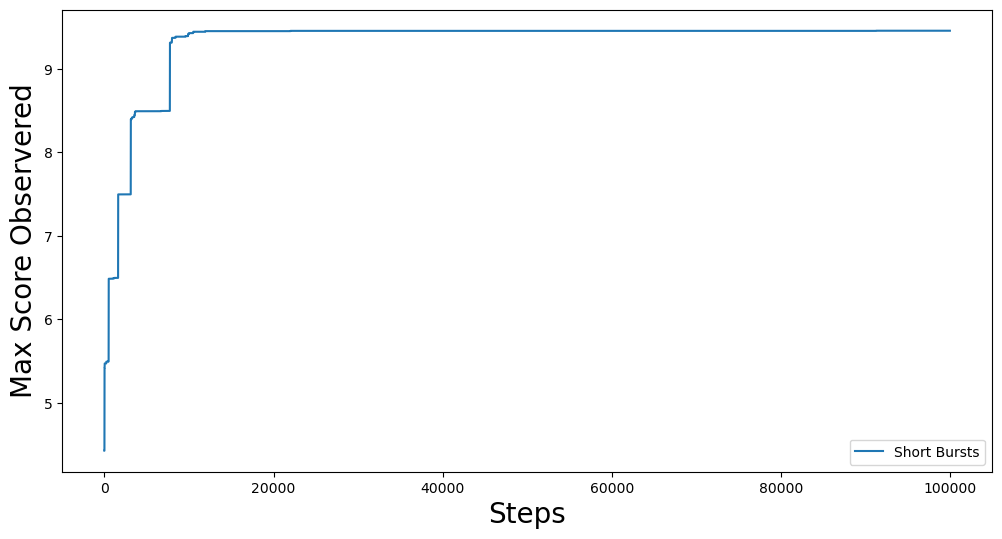

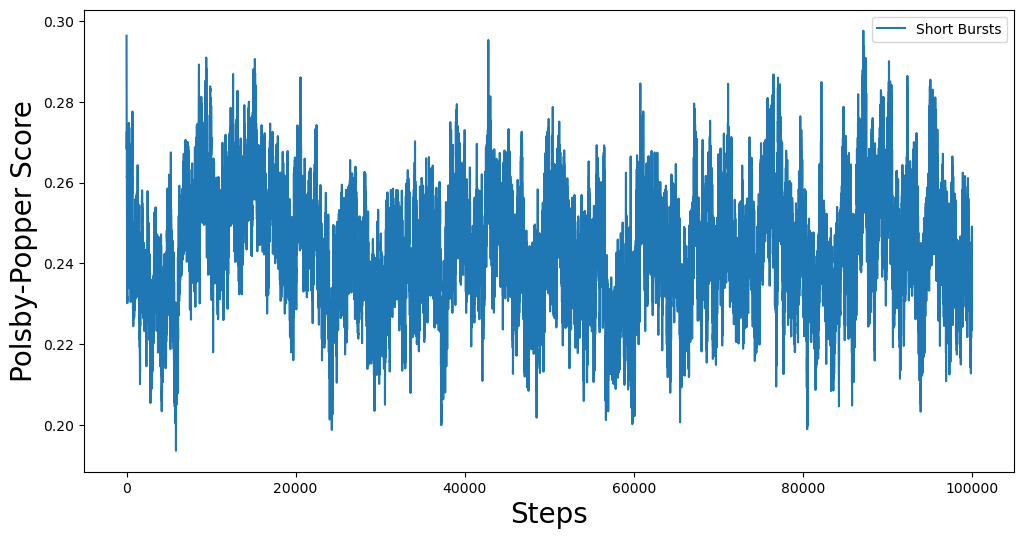

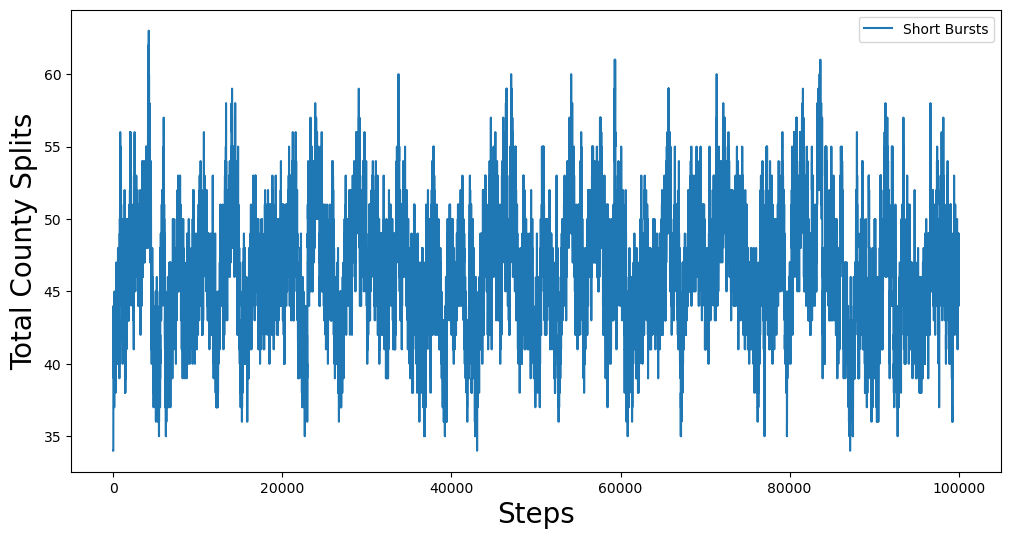


*****************************************
Generating seed plan for AL SH blockgroup
*****************************************

number of nodes, edges: 3925 10903
Effectively using k, L, U = 105 45458 50242
Using one split county, attempting to bipartition cluster into sizes: 52 53
Using one split county, attempting to bipartition cluster into sizes: 26 27
Using one split county, attempting to bipartition cluster into sizes: 13 14
Using one split county, attempting to bipartition cluster into sizes: 7 7
Using one split county, attempting to bipartition cluster into sizes: 3 4
Using one split county, attempting to bipartition cluster into sizes: 2 2
Using one split county, attempting to bipartition cluster into sizes: 1 1
Using one split county, attempting to bipartition cluster into sizes: 1 1
Using one split county, attempting to bipartition cluster into sizes: 1 2
Using one split county, attempting to bipartition cluster into sizes: 1 1
Using one split county, attempting to bipartiti

100%|██████████████████████████████████████████████████████████████████████████| 100000/100000 [39:30<00:00, 42.19it/s]


i gingles pp s1 s2
0 13.4931 0.3434 40 102
1000 23.3957 0.2391 59 171
2000 23.4286 0.2335 61 187
3000 24.4627 0.2286 63 201
4000 24.4875 0.2194 63 193
5000 24.4957 0.2192 62 188
6000 26.4949 0.2322 61 198
7000 26.4973 0.2351 61 193
8000 26.4979 0.2283 60 200
9000 26.4979 0.2121 61 202
10000 26.499 0.2257 60 195
11000 28.4578 0.2208 64 200
12000 28.4817 0.2216 64 199
13000 29.3675 0.223 64 192
14000 29.4209 0.2218 60 180
15000 29.4331 0.2185 60 199
16000 29.4331 0.2168 63 198
17000 29.4456 0.2292 61 190
18000 29.4459 0.2182 63 198
19000 29.4459 0.2199 60 199
20000 29.4459 0.2326 61 193
21000 29.4459 0.2254 60 194
22000 29.4459 0.2275 63 195
23000 29.4459 0.2268 57 194
24000 29.4459 0.2215 63 201
25000 29.4459 0.2274 60 196
26000 29.4459 0.224 60 197
27000 29.4459 0.2135 60 202
28000 29.4459 0.2273 62 199
29000 29.4459 0.2284 59 191
30000 29.4559 0.2255 60 204
31000 29.4559 0.2222 58 189
32000 29.4559 0.2169 60 191
33000 29.4559 0.2159 62 196
34000 29.4559 0.2097 60 199
35000 29.4559 0.2

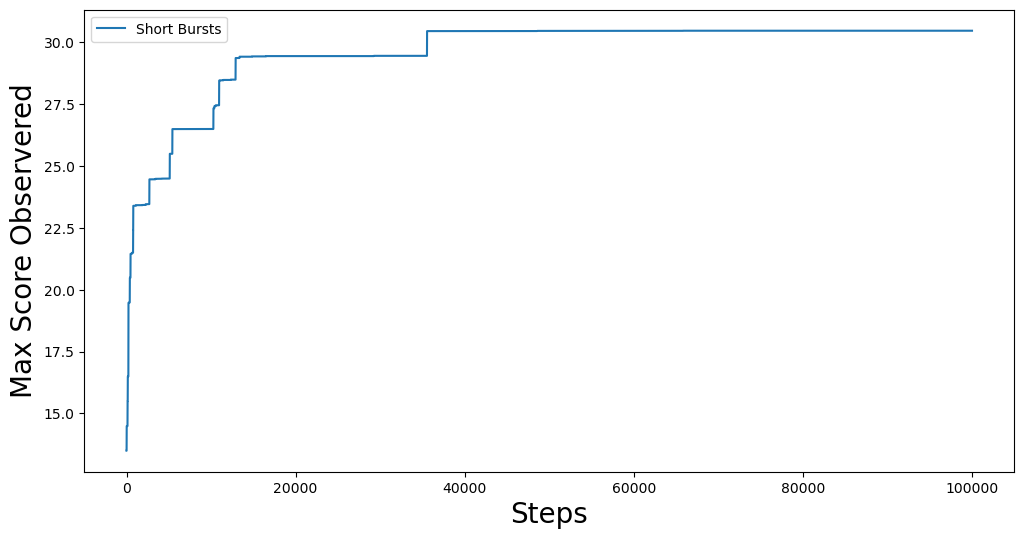

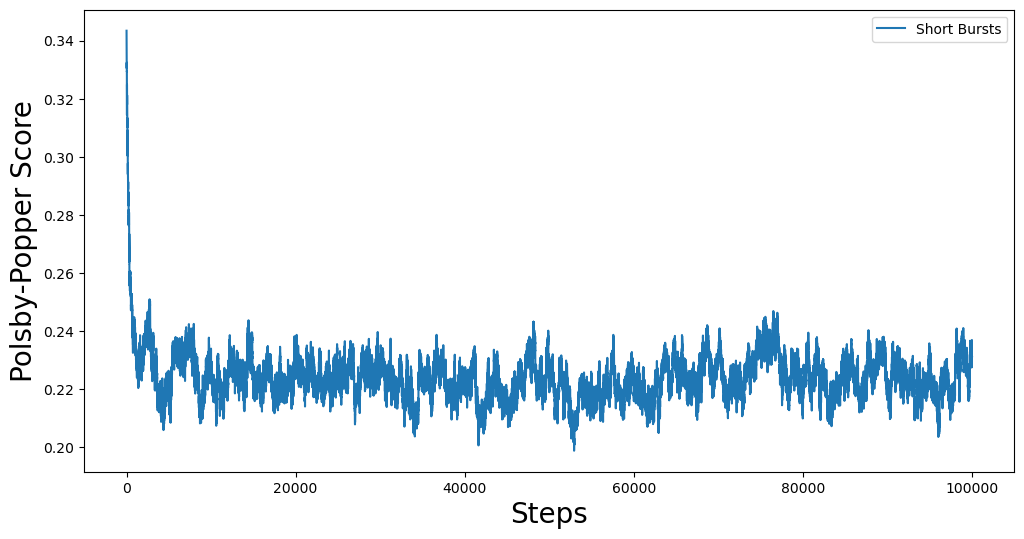

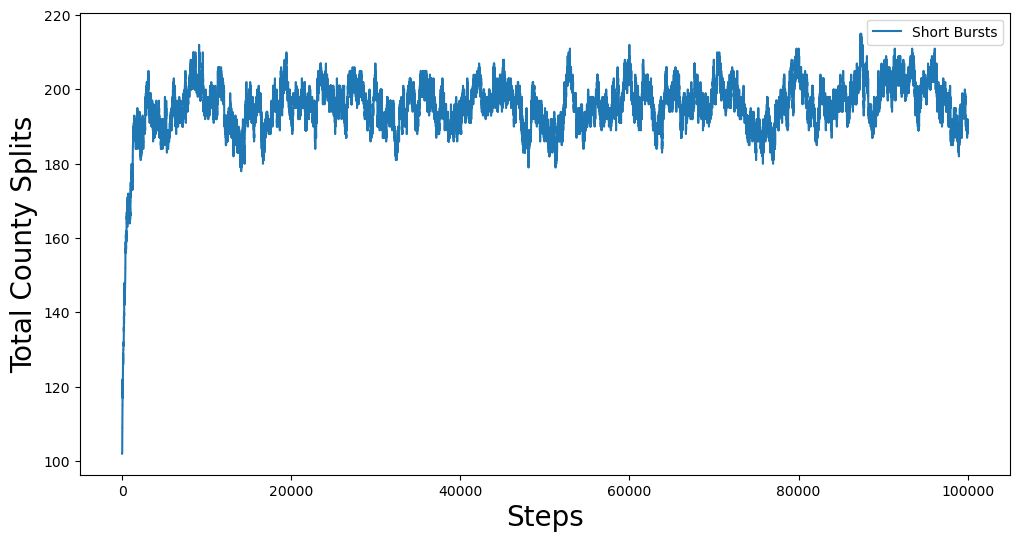


*****************************************
Starting short bursts for AL SH blockgroup
Region-aware: True
*****************************************



100%|██████████████████████████████████████████████████████████████████████████| 100000/100000 [37:07<00:00, 44.89it/s]


i gingles pp s1 s2
0 13.4931 0.3434 40 102
1000 24.4916 0.271 43 111
2000 26.419 0.2715 41 114
3000 26.4343 0.2726 45 118
4000 26.4477 0.2583 45 123
5000 26.4802 0.2611 46 117
6000 27.3578 0.2652 49 121
7000 27.4487 0.2689 46 120
8000 27.4686 0.2719 46 115
9000 27.4686 0.2799 44 118
10000 27.4999 0.2769 45 118
11000 27.4999 0.267 46 120
12000 27.4999 0.2611 43 117
13000 28.4278 0.2738 45 115
14000 28.4367 0.2584 49 121
15000 28.4367 0.2563 42 121
16000 28.4367 0.2692 42 116
17000 28.4367 0.2748 43 113
18000 28.4367 0.2723 40 116
19000 28.4367 0.2625 43 121
20000 28.4367 0.2651 43 118
21000 28.4367 0.263 45 116
22000 28.4367 0.2517 43 115
23000 28.4367 0.2685 45 122
24000 28.4367 0.2614 46 122
25000 28.4367 0.2453 45 116
26000 28.4367 0.2624 47 118
27000 28.4367 0.2734 44 115
28000 28.4367 0.2669 42 110
29000 28.4367 0.2755 43 117
30000 28.4367 0.2609 44 120
31000 28.4367 0.2637 45 130
32000 28.4367 0.2757 40 111
33000 28.4416 0.2585 44 127
34000 28.4416 0.2682 44 126
35000 28.4416 0.27

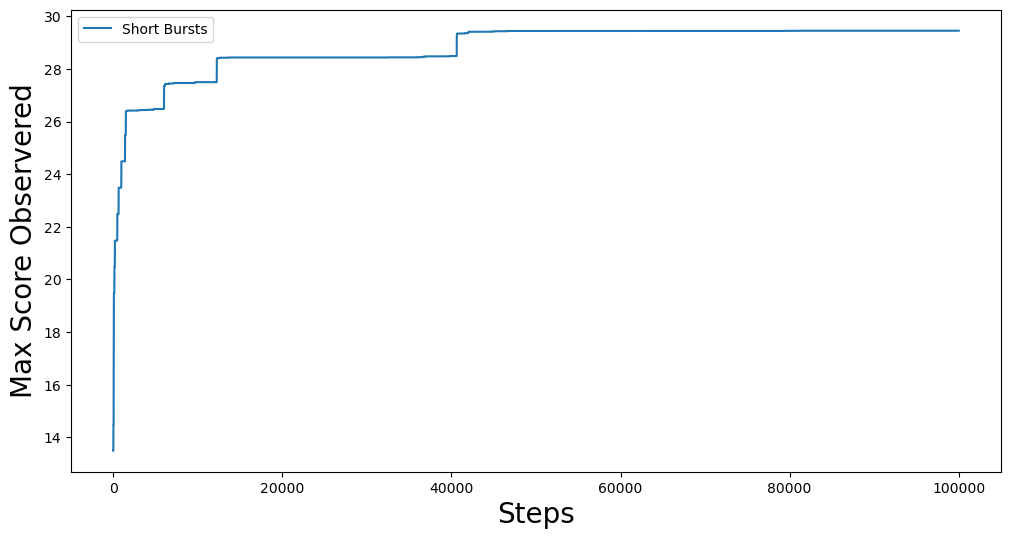

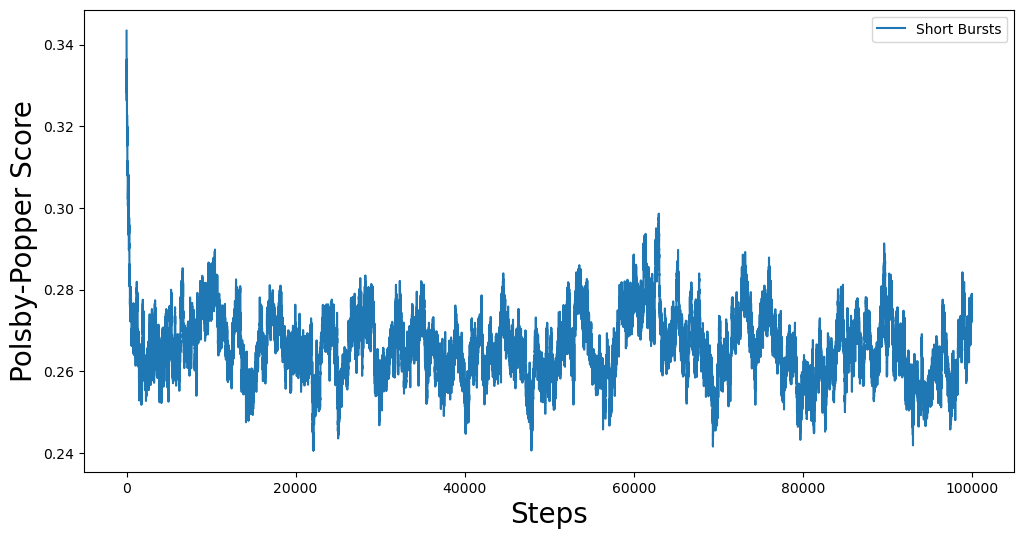

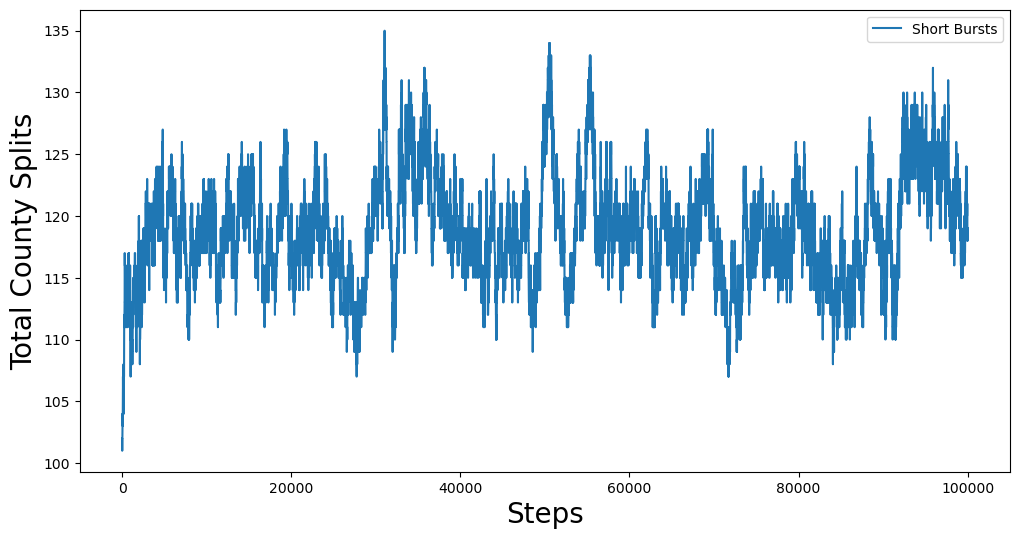


*****************************************
Generating seed plan for GA SS vtd
*****************************************

number of nodes, edges: 2698 7705
Effectively using k, L, U = 56 181720 200848
Using one split county, attempting to bipartition cluster into sizes: 28 28
Using one split county, attempting to bipartition cluster into sizes: 14 14
Using one split county, attempting to bipartition cluster into sizes: 7 7
Using one split county, attempting to bipartition cluster into sizes: 3 4
Using one split county, attempting to bipartition cluster into sizes: 2 2
Using one split county, attempting to bipartition cluster into sizes: 1 1
Using one split county, attempting to bipartition cluster into sizes: 1 1
Using one split county, attempting to bipartition cluster into sizes: 1 2
Using one split county, attempting to bipartition cluster into sizes: 1 1
Using one split county, attempting to bipartition cluster into sizes: 3 4
Using one split county, attempting to bipartition cluste

100%|██████████████████████████████████████████████████████████████████████████| 100000/100000 [38:48<00:00, 42.94it/s]


i gingles pp s1 s2
0 10.4953 0.3112 31 53
1000 15.4674 0.1932 83 145
2000 15.4773 0.1927 95 166
3000 15.4835 0.1911 81 150
4000 15.4876 0.1977 87 157
5000 15.4956 0.1966 88 155
6000 15.4976 0.1854 92 165
7000 16.4047 0.1855 88 160
8000 16.4651 0.1694 94 173
9000 17.431 0.1721 100 175
10000 17.431 0.1788 90 166
11000 17.434 0.1735 91 161
12000 17.434 0.1738 82 157
13000 17.4359 0.1937 90 163
14000 17.4778 0.1798 92 165
15000 17.4992 0.1739 90 162
16000 17.4992 0.1727 90 162
17000 18.3622 0.1641 91 160
18000 18.3986 0.1875 94 157
19000 18.4605 0.1687 94 170
20000 18.4686 0.1619 95 171
21000 18.4884 0.1788 87 155
22000 18.4932 0.173 83 158
23000 19.3329 0.1637 92 165
24000 19.4143 0.1701 87 165
25000 19.4164 0.1574 96 172
26000 19.4243 0.1811 93 164
27000 19.4243 0.1804 86 160
28000 19.426 0.1694 92 162
29000 19.4426 0.1703 93 163
30000 19.4426 0.1765 87 158
31000 19.4426 0.1757 88 166
32000 19.451 0.1602 91 157
33000 19.4522 0.1853 87 160
34000 19.4522 0.1648 87 163
35000 19.4522 0.1707 

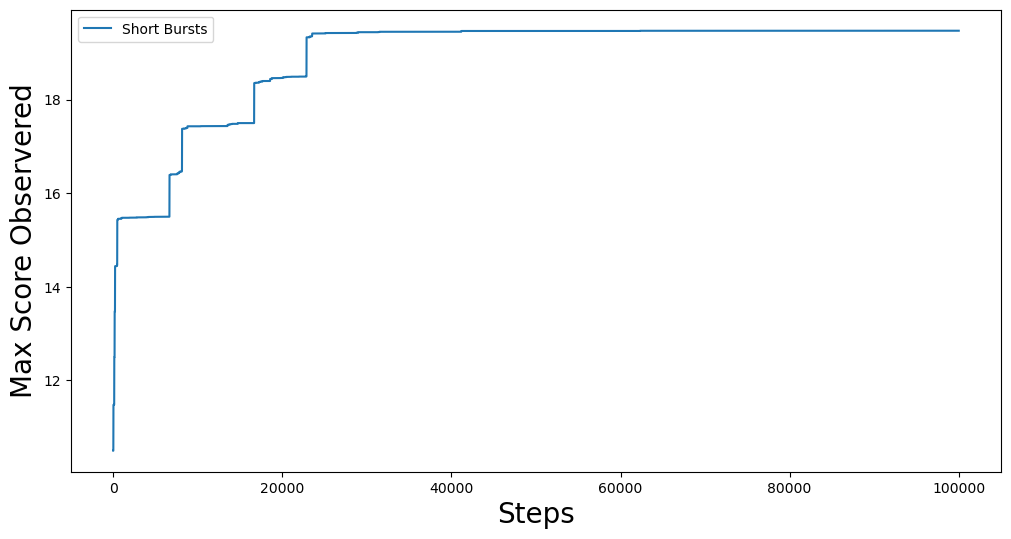

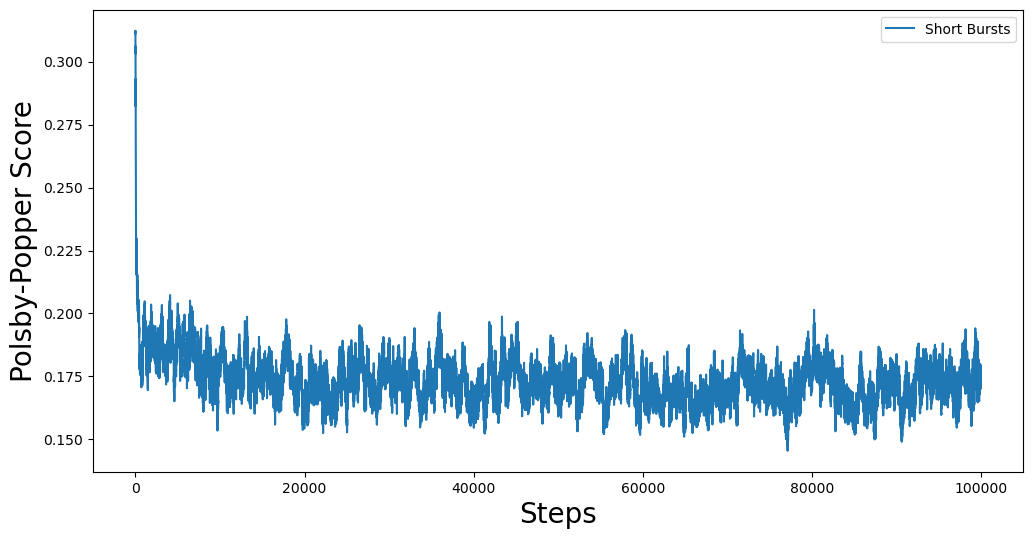

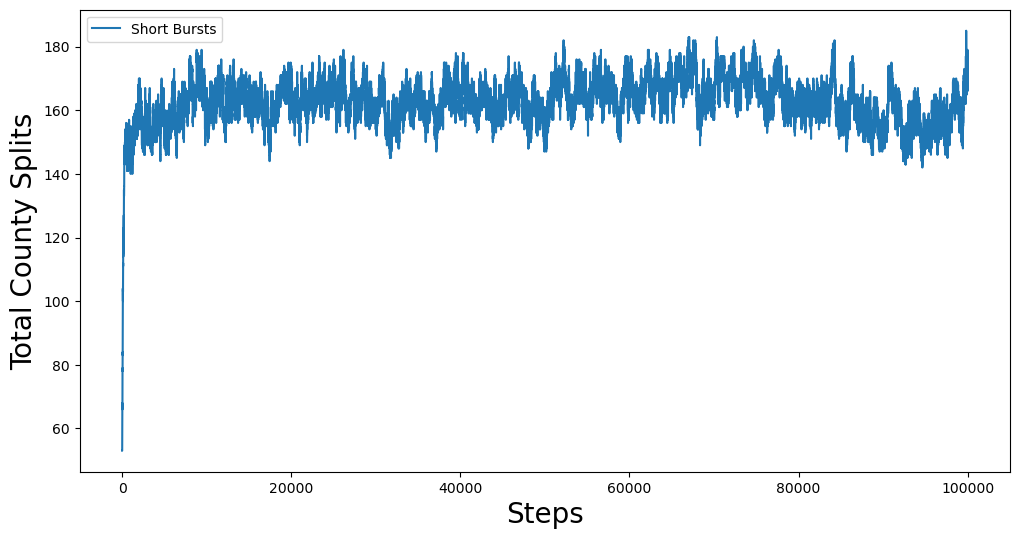


*****************************************
Starting short bursts for GA SS vtd
Region-aware: True
*****************************************



100%|██████████████████████████████████████████████████████████████████████████| 100000/100000 [33:42<00:00, 49.44it/s]


i gingles pp s1 s2
0 10.4953 0.3112 31 53
1000 14.4069 0.2479 41 70
2000 14.4725 0.2707 41 66
3000 16.4066 0.2587 41 64
4000 16.414 0.2422 45 69
5000 16.4843 0.2513 35 64
6000 17.4049 0.2558 45 78
7000 17.4076 0.2379 47 80
8000 17.4411 0.2317 38 69
9000 17.4514 0.2471 40 72
10000 17.4521 0.2338 45 75
11000 17.4521 0.2415 39 71
12000 17.4521 0.2372 36 66
13000 17.4521 0.2307 45 74
14000 17.4672 0.2469 37 66
15000 17.4672 0.2406 42 72
16000 17.4672 0.2373 41 77
17000 17.4672 0.2266 45 77
18000 17.4672 0.2248 44 75
19000 17.4672 0.246 43 68
20000 17.4672 0.2532 37 64
21000 17.4707 0.2201 44 78
22000 17.4707 0.2333 48 79
23000 17.4707 0.2376 43 76
24000 17.4707 0.2438 40 72
25000 17.4707 0.2618 39 70
26000 17.4707 0.2331 41 72
27000 17.4707 0.2296 47 80
28000 17.4707 0.2333 40 77
29000 17.4717 0.2248 48 88
30000 17.4717 0.2309 45 80
31000 17.4717 0.2509 46 77
32000 17.4717 0.2323 50 88
33000 17.4717 0.2377 43 75
34000 17.4717 0.2521 43 78
35000 17.4717 0.2308 51 82
36000 17.4717 0.2531 37 

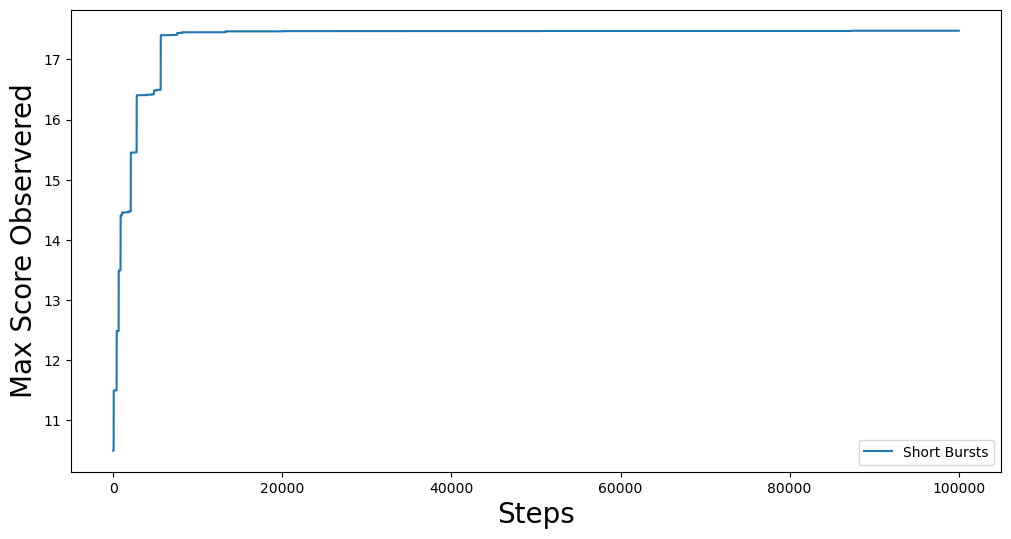

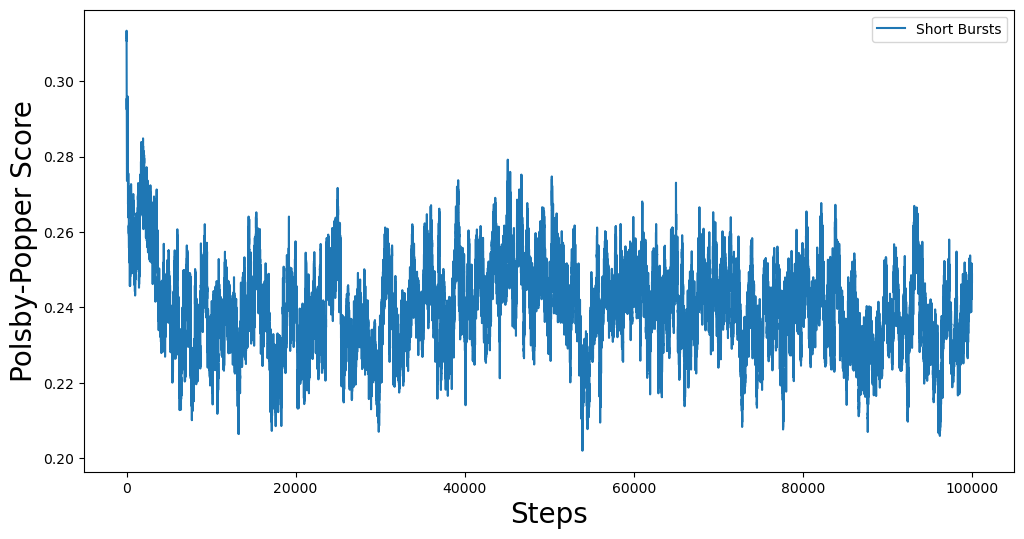

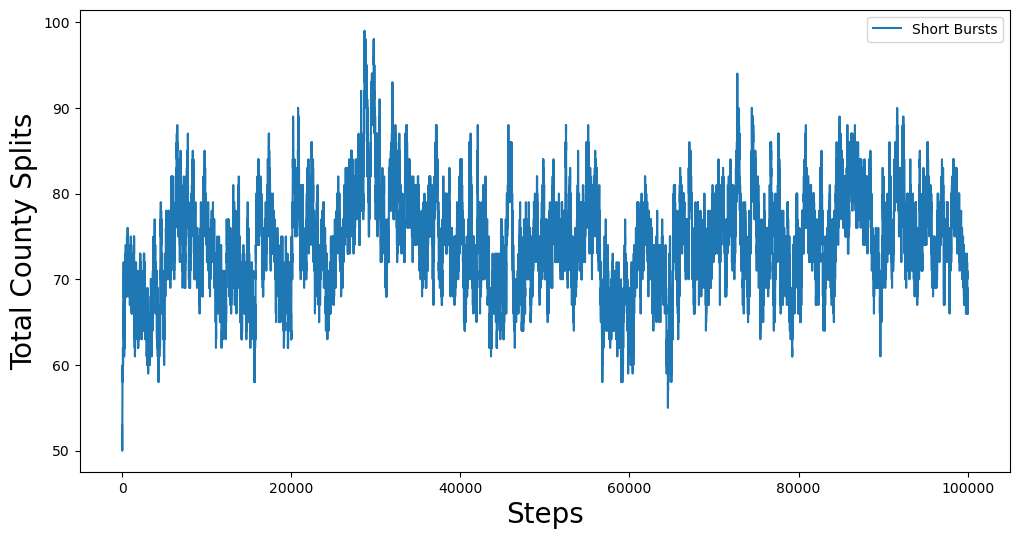


*****************************************
Generating seed plan for GA SH blockgroup
*****************************************

number of nodes, edges: 7446 20537
Effectively using k, L, U = 180 56536 62486
Using one split county, attempting to bipartition cluster into sizes: 90 90
Using one split county, attempting to bipartition cluster into sizes: 45 45
Using one split county, attempting to bipartition cluster into sizes: 22 23
Using one split county, attempting to bipartition cluster into sizes: 11 12
Using one split county, attempting to bipartition cluster into sizes: 6 6
Using one split county, attempting to bipartition cluster into sizes: 3 3
Using one split county, attempting to bipartition cluster into sizes: 1 2
Using one split county, attempting to bipartition cluster into sizes: 1 1
Using one split county, attempting to bipartition cluster into sizes: 1 2
Using one split county, attempting to bipartition cluster into sizes: 1 1
Using one split county, attempting to biparti

100%|████████████████████████████████████████████████████████████████████████| 100000/100000 [1:08:51<00:00, 24.20it/s]


i gingles pp s1 s2
0 35.4901 0.3626 69 174
1000 39.4987 0.2483 113 321
2000 41.4801 0.2339 120 370
3000 42.4981 0.2385 123 378
4000 44.4801 0.2351 125 367
5000 45.4949 0.2234 119 374
6000 46.4441 0.2292 127 373
7000 46.4549 0.2301 130 372
8000 46.4763 0.234 128 358
9000 46.4929 0.2313 129 356
10000 47.4835 0.2425 126 348
11000 48.4835 0.2349 129 383
12000 48.4843 0.2188 130 384
13000 48.4872 0.2265 126 370
14000 48.4891 0.2343 130 372
15000 50.48 0.2304 127 377
16000 50.48 0.2277 123 371
17000 50.489 0.221 126 373
18000 50.489 0.236 126 363
19000 51.489 0.2246 129 363
20000 51.489 0.2275 134 379
21000 51.489 0.2158 122 376
22000 51.489 0.2187 128 371
23000 51.489 0.2206 134 387
24000 51.489 0.2274 131 384
25000 51.489 0.2231 131 383
26000 51.4928 0.2174 136 390
27000 51.4928 0.2165 131 383
28000 51.4928 0.2244 125 369
29000 51.4958 0.2325 123 350
30000 52.4611 0.2267 128 365
31000 52.4611 0.2249 128 368
32000 52.4772 0.2262 128 359
33000 52.4772 0.2388 123 362
34000 52.4772 0.2392 123 

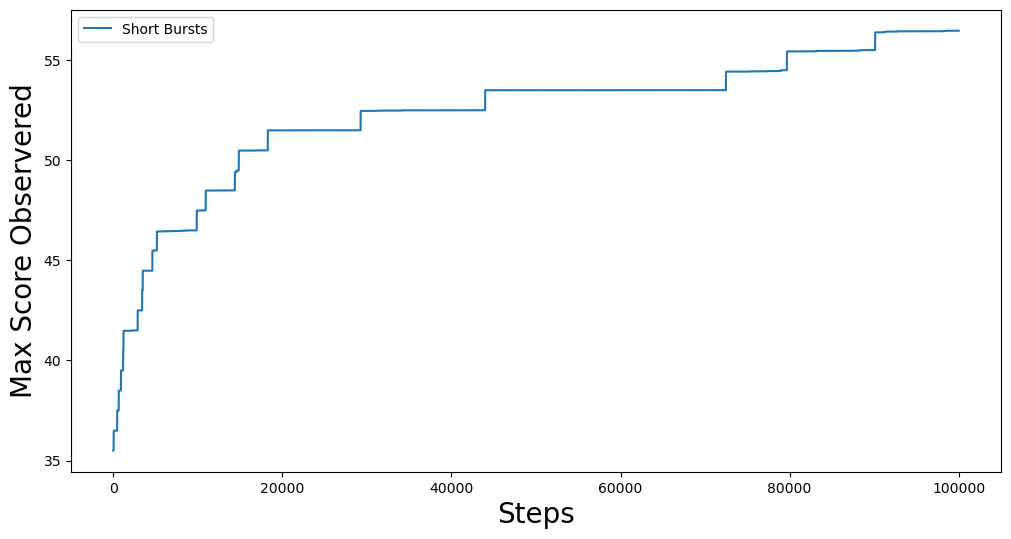

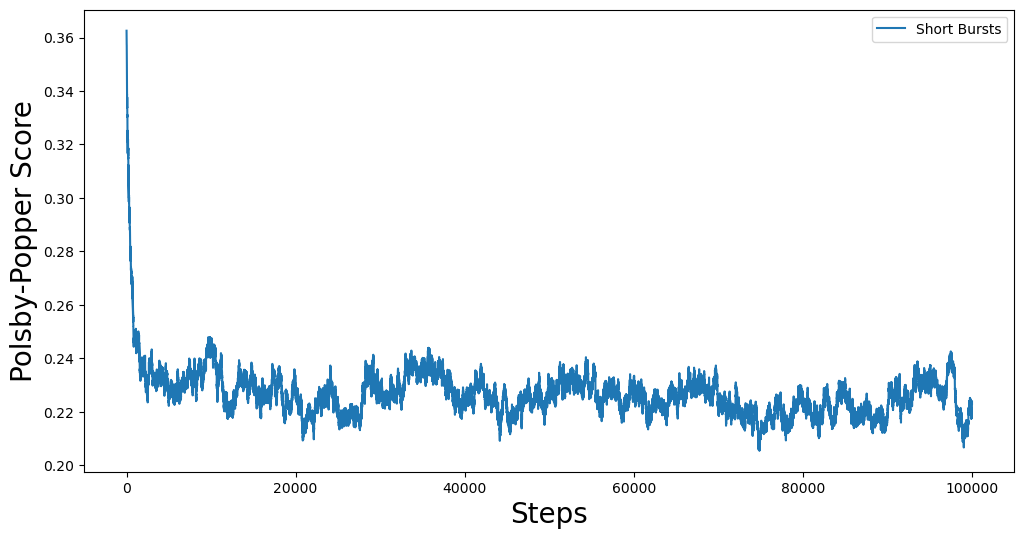

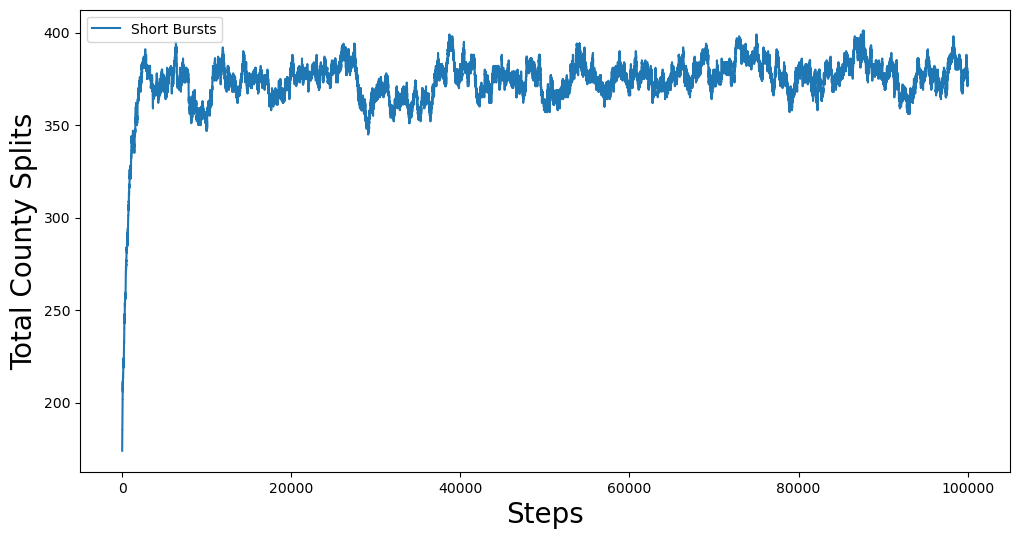


*****************************************
Starting short bursts for GA SH blockgroup
Region-aware: True
*****************************************



100%|████████████████████████████████████████████████████████████████████████| 100000/100000 [1:05:36<00:00, 25.40it/s]


i gingles pp s1 s2
0 35.4901 0.3626 69 174
1000 40.4869 0.2885 79 212
2000 43.4952 0.2812 81 209
3000 44.487 0.2819 80 210
4000 45.4778 0.2783 79 211
5000 45.4818 0.2791 80 205
6000 45.4818 0.2679 92 213
7000 45.4818 0.2638 90 220
8000 45.4818 0.2805 81 199
9000 45.4818 0.2758 84 216
10000 46.4818 0.2799 80 205
11000 46.4898 0.2866 75 194
12000 46.4965 0.278 77 205
13000 46.4965 0.2681 82 212
14000 46.4965 0.2655 78 203
15000 47.4818 0.2722 75 206
16000 47.4884 0.2709 79 205
17000 47.4884 0.2791 78 208
18000 47.4884 0.2779 74 203
19000 47.4884 0.2871 75 203
20000 47.4884 0.2875 78 209
21000 47.4884 0.2803 76 205
22000 47.4884 0.2696 81 212
23000 47.4884 0.2744 83 214
24000 47.4884 0.2782 87 212
25000 47.4884 0.2797 83 217
26000 47.4884 0.2703 87 215
27000 47.4884 0.283 89 217
28000 48.4884 0.275 85 212
29000 48.4884 0.2623 74 207
30000 48.4968 0.2763 75 208
31000 48.4979 0.2617 74 216
32000 48.4992 0.2603 76 215
33000 49.4818 0.2698 79 217
34000 49.4818 0.2725 75 209
35000 49.4818 0.26

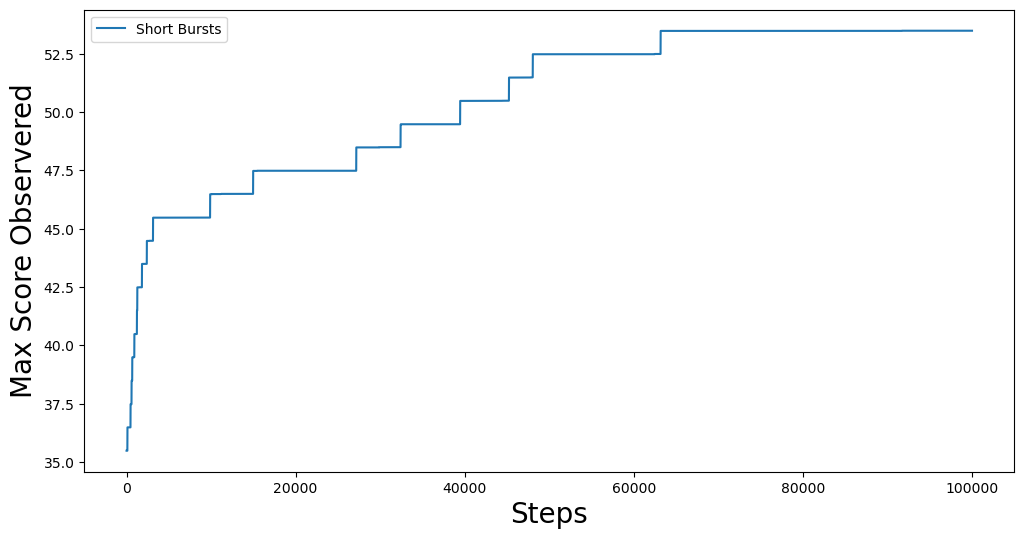

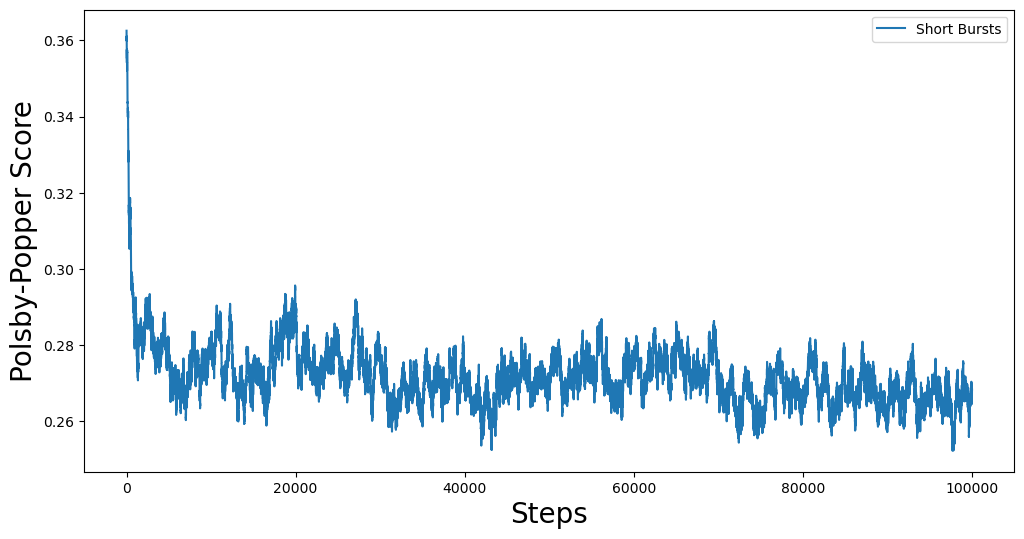

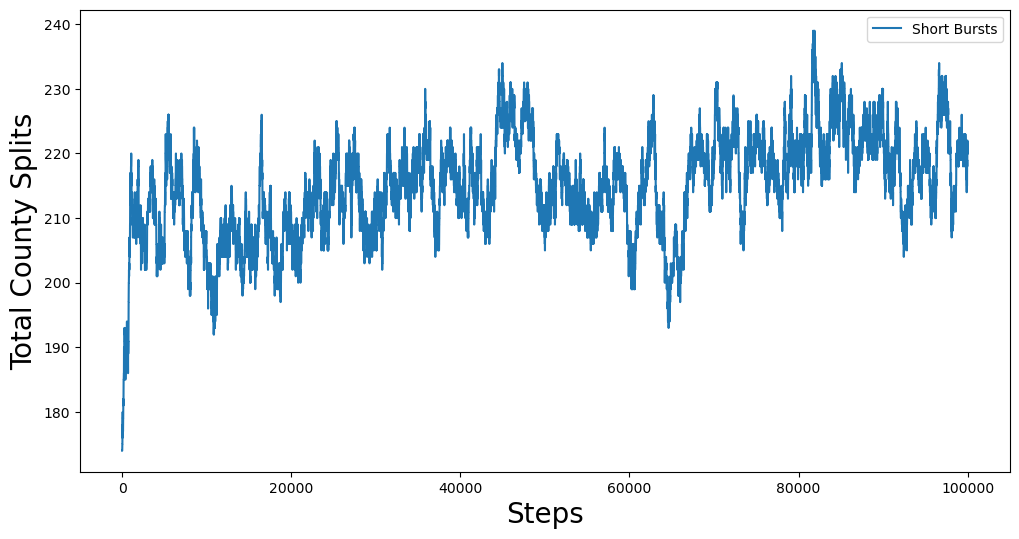

In [4]:
for state in states:

    for district_type in district_types:

        level = 'vtd' if district_type == 'SS' else 'blockgroup'

        print("\n*****************************************")
        print("Generating seed plan for",state,district_type,level)
        print("*****************************************\n")

        # get graph data
        filename = state + '_' + level + ".json"
        G = Graph.from_json(filepath+filename)
        for i in G.nodes:
            G.nodes[i]['TOTPOP'] = G.nodes[i]['P0010001']
            G.nodes[i]['VAP'] = G.nodes[i]['P0030001']
            G.nodes[i]['MVAP'] = sum( G.nodes[i][code] for code in codes )
        print("number of nodes, edges:",G.number_of_nodes(),G.number_of_edges())
        
        # set population parameters
        k = number_of_districts[state,district_type]
        total_population = sum( G.nodes[i]['TOTPOP'] for i in G.nodes )
        ideal_population = total_population / k
        L = math.ceil( ideal_population * (1-deviation/2) )
        U = math.floor( ideal_population * (1+deviation/2) )
        print("Effectively using k, L, U =",k,L,U)

        # get initial plan
        DG = nx.DiGraph(G)
        DG._k = k
        DG._L = L
        DG._U = U
        mip_districts = recursive_bipartition_heuristic(DG)
        mip_labeling = { i : j for j in range(k) for i in mip_districts[j] }

        print("seed_plan_"+state+"_"+district_type+" =",mip_districts)
        report_metrics(G, mip_districts, minority)
        
        for region_aware in {False, True}:

            print("\n*****************************************")
            print("Starting short bursts for",state,district_type,level)
            print("Region-aware:",region_aware)
            print("*****************************************\n")
            
            # GerryChain/ShortBursts/Gingleator setup
            chain_updaters = {
            "population": updaters.Tally("TOTPOP", alias="population"),
            "VAP": updaters.Tally("VAP"),
            "MVAP": updaters.Tally("MVAP")
            }
            
            initial_partition = Partition(graph=G,
                assignment=mip_labeling,
            updaters=chain_updaters
            )

            my_surcharge = 0.5 if region_aware else 0.0
            proposal = partial(
                proposals.recom,
                pop_col="TOTPOP",
                pop_target=ideal_population,
                epsilon=deviation/2,
                node_repeats=1,
                region_surcharge={"COUNTY": my_surcharge}
            )
            
            constraints = constraints_class.within_percent_of_ideal_population(initial_partition, deviation/2)
                
            gingles = Gingleator(
                proposal,
                constraints,
                initial_partition,
                minority_pop_col="MVAP",
                total_pop_col="VAP",
                score_function=Gingleator.reward_partial_dist
            )
    
            # run short bursts
            max_scores_sb = np.zeros(total_steps)
            scores_sb = np.zeros(total_steps)
            pp = np.zeros(total_steps)
            s1 = np.zeros(total_steps)
            s2 = np.zeros(total_steps)
            
            incumbent_plan = mip_districts.copy()
            incumbent_i = -1
            for i, part in enumerate(gingles.short_bursts(burst_length, num_bursts, with_progress_bar=True)):
                max_scores_sb[i] = gingles.best_score
                scores_sb[i] = gingles.score(part)
                districts = [ list() for j in range(k) ]
                for v in G.nodes:
                    j = part.assignment[v]
                    districts[j].append(v)
                s1[i] = number_of_counties_split(G, districts)
                s2[i] = number_of_county_splits(G, districts)
                pp[i] = average_polsby_popper(G, districts)
                
                # update incumbent?
                case1 = math.floor( scores_sb[i] ) > math.floor( scores_sb[incumbent_i] )
                case2 = math.floor( scores_sb[i] ) == math.floor( scores_sb[incumbent_i] )
                case3 = pp[i] > pp[incumbent_i] 
                if case1 or (case2 and case3):
                    incumbent_i = i
                    incumbent_plan = districts.copy()
    
            # reporting
            print("i gingles pp s1 s2")
            for i in range(total_steps):
                if i%1000==0:
                    print(i,round(scores_sb[i], 4), round(pp[i],4), round(s1[i]), round(s2[i]))
    
            print("incumbent_plan_"+state+"_"+district_type+" =",incumbent_plan)
            report_metrics(G, incumbent_plan, minority)
    
            fig, ax = plt.subplots(figsize=(12,6))
            plt.plot(max_scores_sb, label="Short Bursts")
            plt.xlabel("Steps", fontsize=20)
            plt.ylabel("Max Score Observered", fontsize=20)
            plt.legend()
            plt.show()
    
            fig, ax = plt.subplots(figsize=(12,6))
            plt.plot(pp, label="Short Bursts")
            plt.xlabel("Steps", fontsize=20)
            plt.ylabel("Polsby-Popper Score", fontsize=20)
            plt.legend()
            plt.show()
    
            fig, ax = plt.subplots(figsize=(12,6))
            plt.plot(s2, label="Short Bursts")
            plt.xlabel("Steps", fontsize=20)
            plt.ylabel("Total County Splits", fontsize=20)
            plt.legend()
            plt.show()